### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**:Shafira Asya Monica

**Student ID**:20817930

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [2]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd

In [3]:
#Loading the Dataset
data = pd.read_csv("/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(10) # Print Top 10 Rows of the dataset for preview

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
#Information on features
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000




---



> Q0. Generate Y - Predictor Value

In [5]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response
columns_to_sum = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
Y = np.sum(data[columns_to_sum], axis=1)

#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




> Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

In [6]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Q1a. Showcase existence of missing value, outliers & imbalances within dataset

data_subset = data.copy()

#Show existence of missing value
null_values = data_subset.isnull().sum().values

dataNull = {"Categories": data_subset.columns, "Total Null Values": null_values}
showNull = pd.DataFrame(dataNull)
showNull_filtered = showNull[showNull['Total Null Values'] != 0]

#Show existence of outliers by using IQR
exclude_binary = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response', 'Complain']
data_checkOutlier = data_subset.drop(exclude_binary, axis=1)
columnOutlier = []
numOutlier = []

def find_outliers_IQR(category):
    dataCategory = data_checkOutlier[category]
    q1= dataCategory.quantile(0.25)
    q3= dataCategory.quantile(0.75)
    IQR=q3-q1

    outliers = dataCategory[((dataCategory<(q1-1.5*IQR)) | (dataCategory>(q3+1.5*IQR)))]

    if(outliers.count()):
        columnOutlier.append(category)
        numOutlier.append(outliers.count())

for category in data_checkOutlier.columns:
    if(data_checkOutlier[category].dtype != object):
        find_outliers_IQR(category)

dataOutlier = {"Categories": columnOutlier, "Total Outliers": numOutlier}
showOutlier = pd.DataFrame(dataOutlier)

#Show imbalances by finding if there exists any value inside category that distribution > 50%
isBalanced = []
maxDistribution = []

def balance_test(target_col_name):
    class_distribution = data_subset[target_col_name].dropna().value_counts()
    class_proportions = class_distribution / class_distribution.sum()

    if any(class_proportions > 0.5):
        isBalanced.append('Imbalanced')
    else:
        isBalanced.append('Balanced')

    maxDistribution.append(np.max(class_proportions))

for category in data_subset.columns:
    balance_test(category)

dataBalance = {"Categories": data_subset.columns, "Balance or Not": isBalanced, "Highest Distribution": maxDistribution}
showBalance = pd.DataFrame(dataBalance)

# Display all
print("\nMISSING VALUES")
print(showNull_filtered)
print("\nOUTLIERS")
print(showOutlier)
print("\nIMBALANCES")
print(showBalance)



MISSING VALUES
  Categories  Total Null Values
4     Income                 24

OUTLIERS
             Categories  Total Outliers
0            Year_Birth               3
1                Income               8
2              MntWines              35
3             MntFruits             227
4       MntMeatProducts             175
5       MntFishProducts             223
6      MntSweetProducts             248
7          MntGoldProds             207
8     NumDealsPurchases              86
9       NumWebPurchases               4
10  NumCatalogPurchases              23
11    NumWebVisitsMonth               8

IMBALANCES
             Categories Balance or Not  Highest Distribution
0                    ID       Balanced              0.000446
1            Year_Birth       Balanced              0.039732
2             Education     Imbalanced              0.503125
3        Marital_Status       Balanced              0.385714
4                Income       Balanced              0.005415
5           

>  Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.

In [7]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT

# (i) Missing Values
data[showNull_filtered["Categories"]] = data[showNull_filtered["Categories"]].fillna(data[showNull_filtered["Categories"]].mean())

# (ii) Outliers
for column in showOutlier["Categories"]:
    q1= data[column].quantile(0.25)
    q3= data[column].quantile(0.75)
    IQR=q3-q1

    data[column] = data[column].clip(lower=(q1-1.5*IQR), upper=(q3+1.5*IQR))

> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Feature Clipping (Min/Max) | As the categories with outliers are mostly continuous, it should still make sense to bring lower values to the lower IQR boundary and respectively for the higher values (e.g. It makes sense to have a low purchase amount of a product, and capping the value to lower IQR bound can still capture the essence that the customer has a low purchase of that product |
|Handling Missing Values| Fill N/A with Mean | The category (Income) is found to be quite balanced and it might be a waste if I remove all rows with Income value as N/A |


>  Q1d. Plot 3 or more types of charts over all columns of data

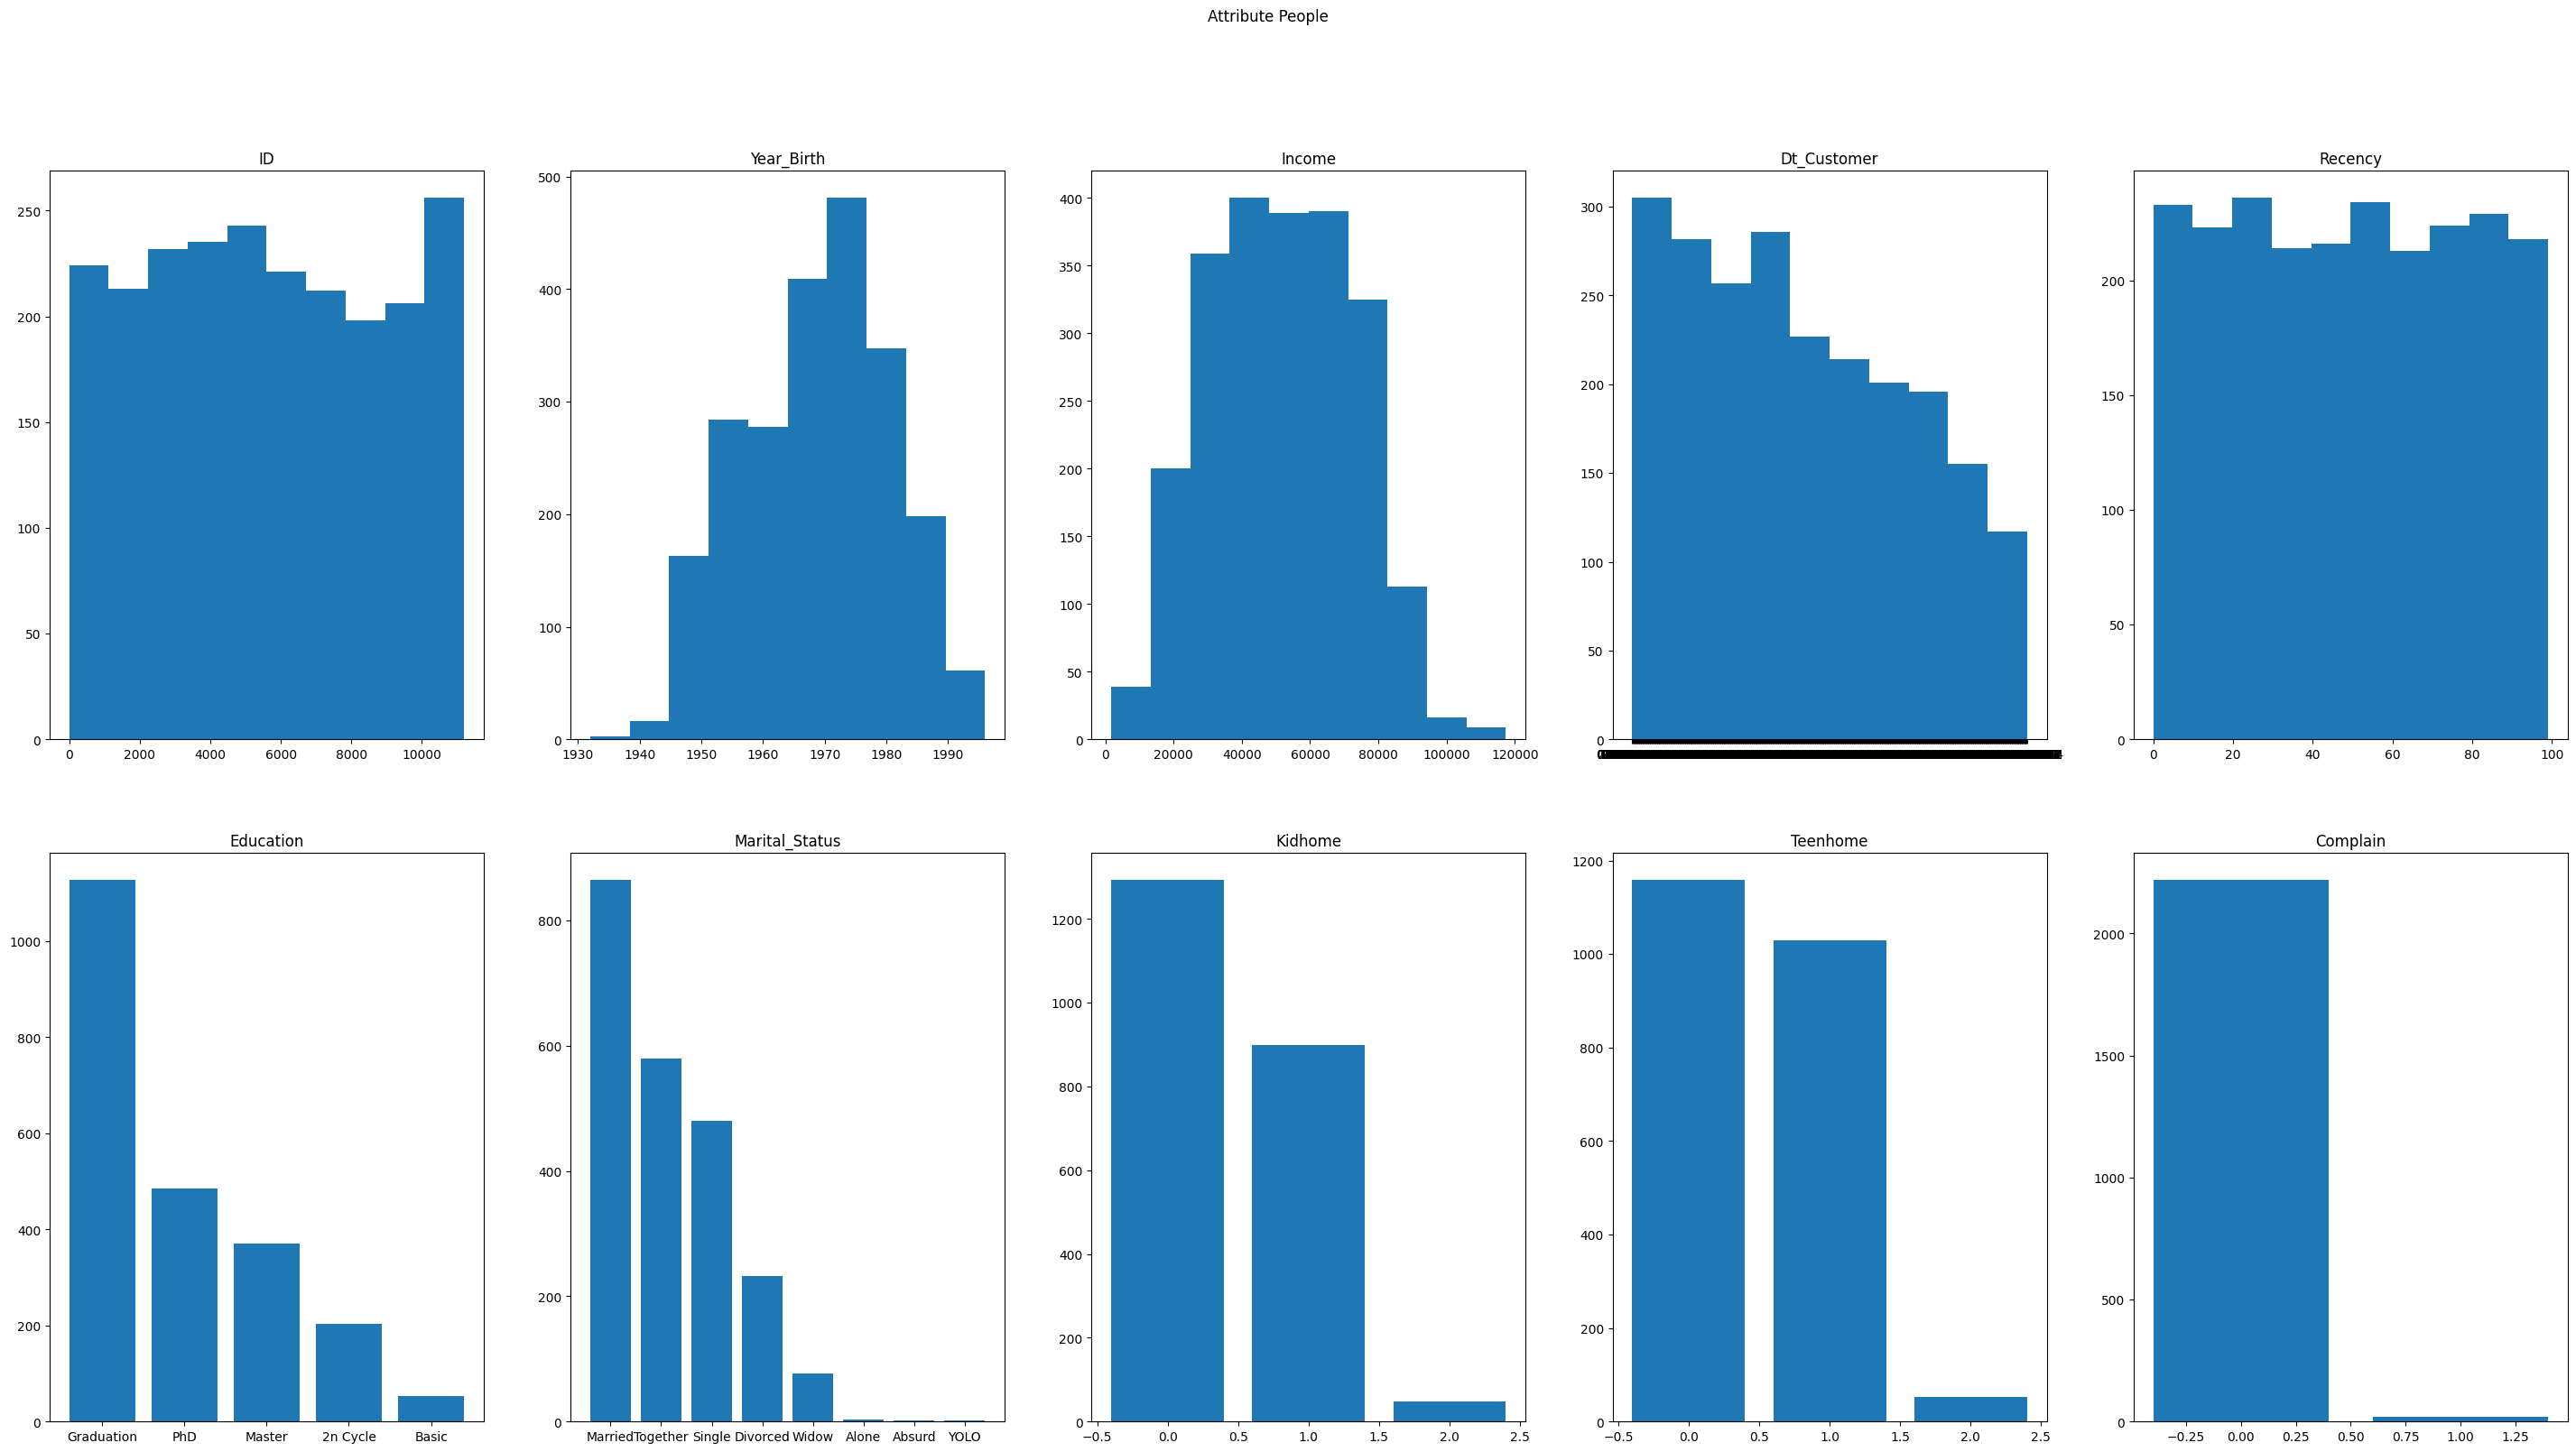

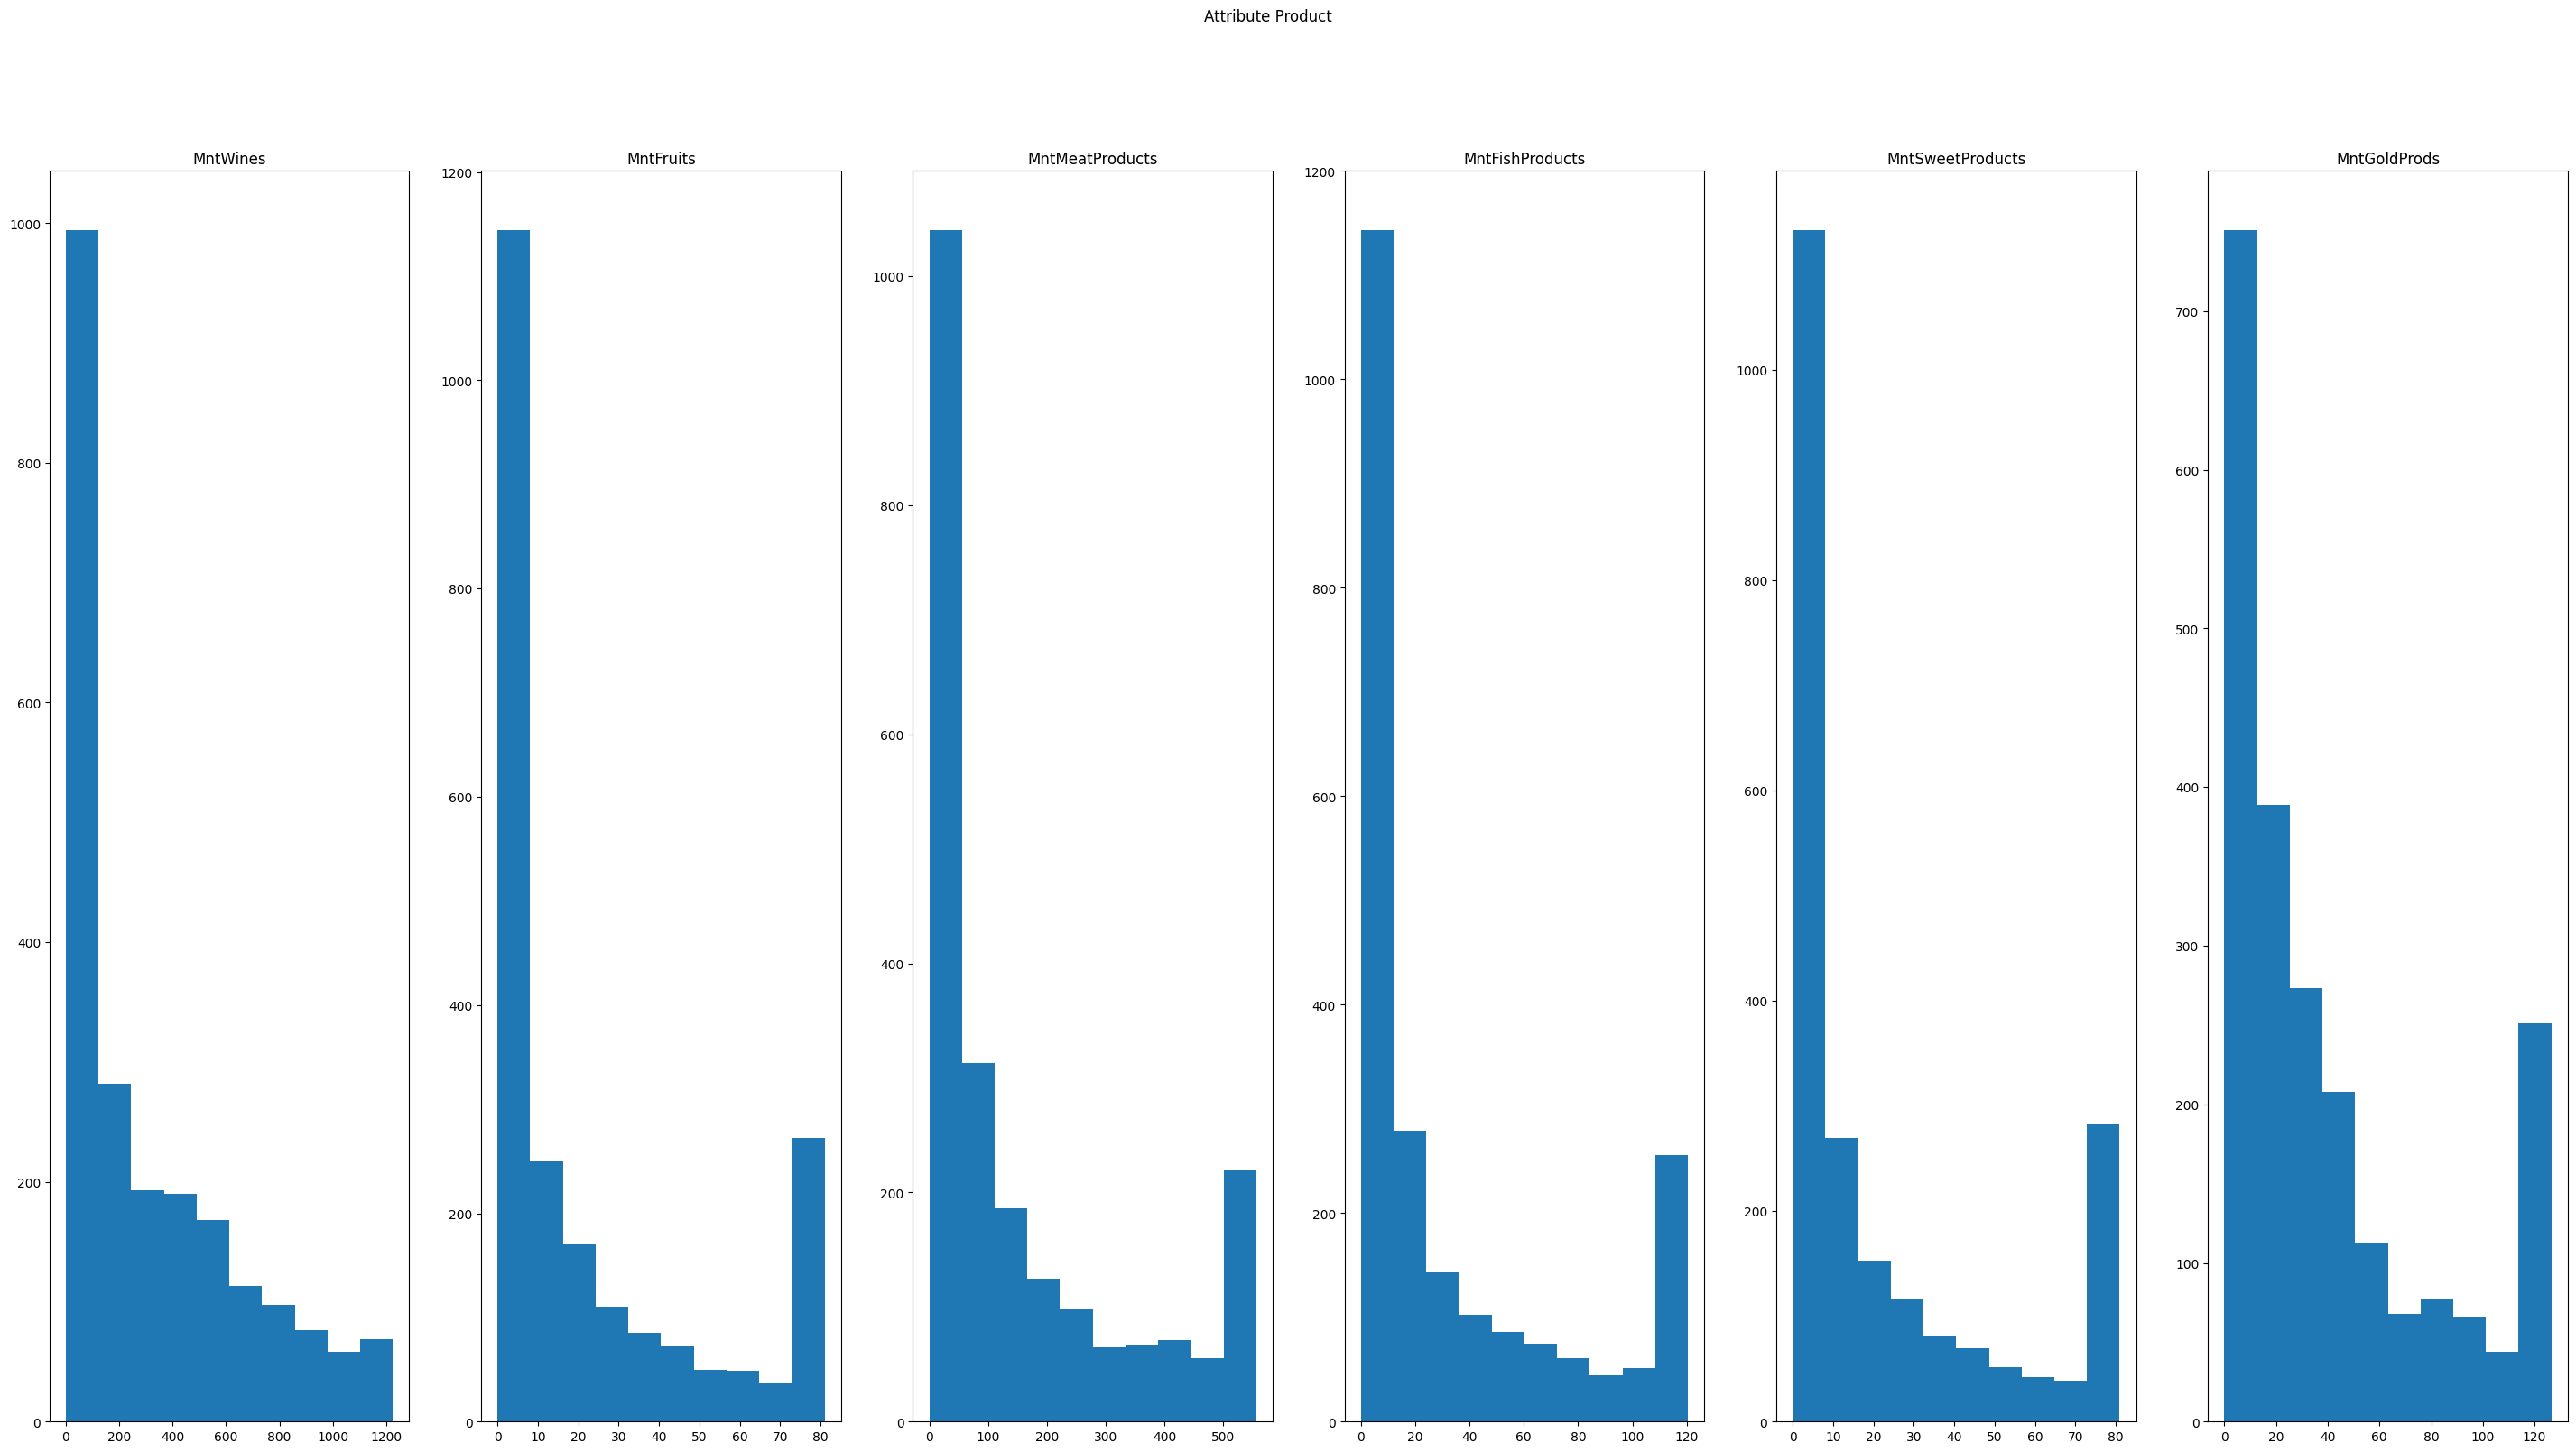

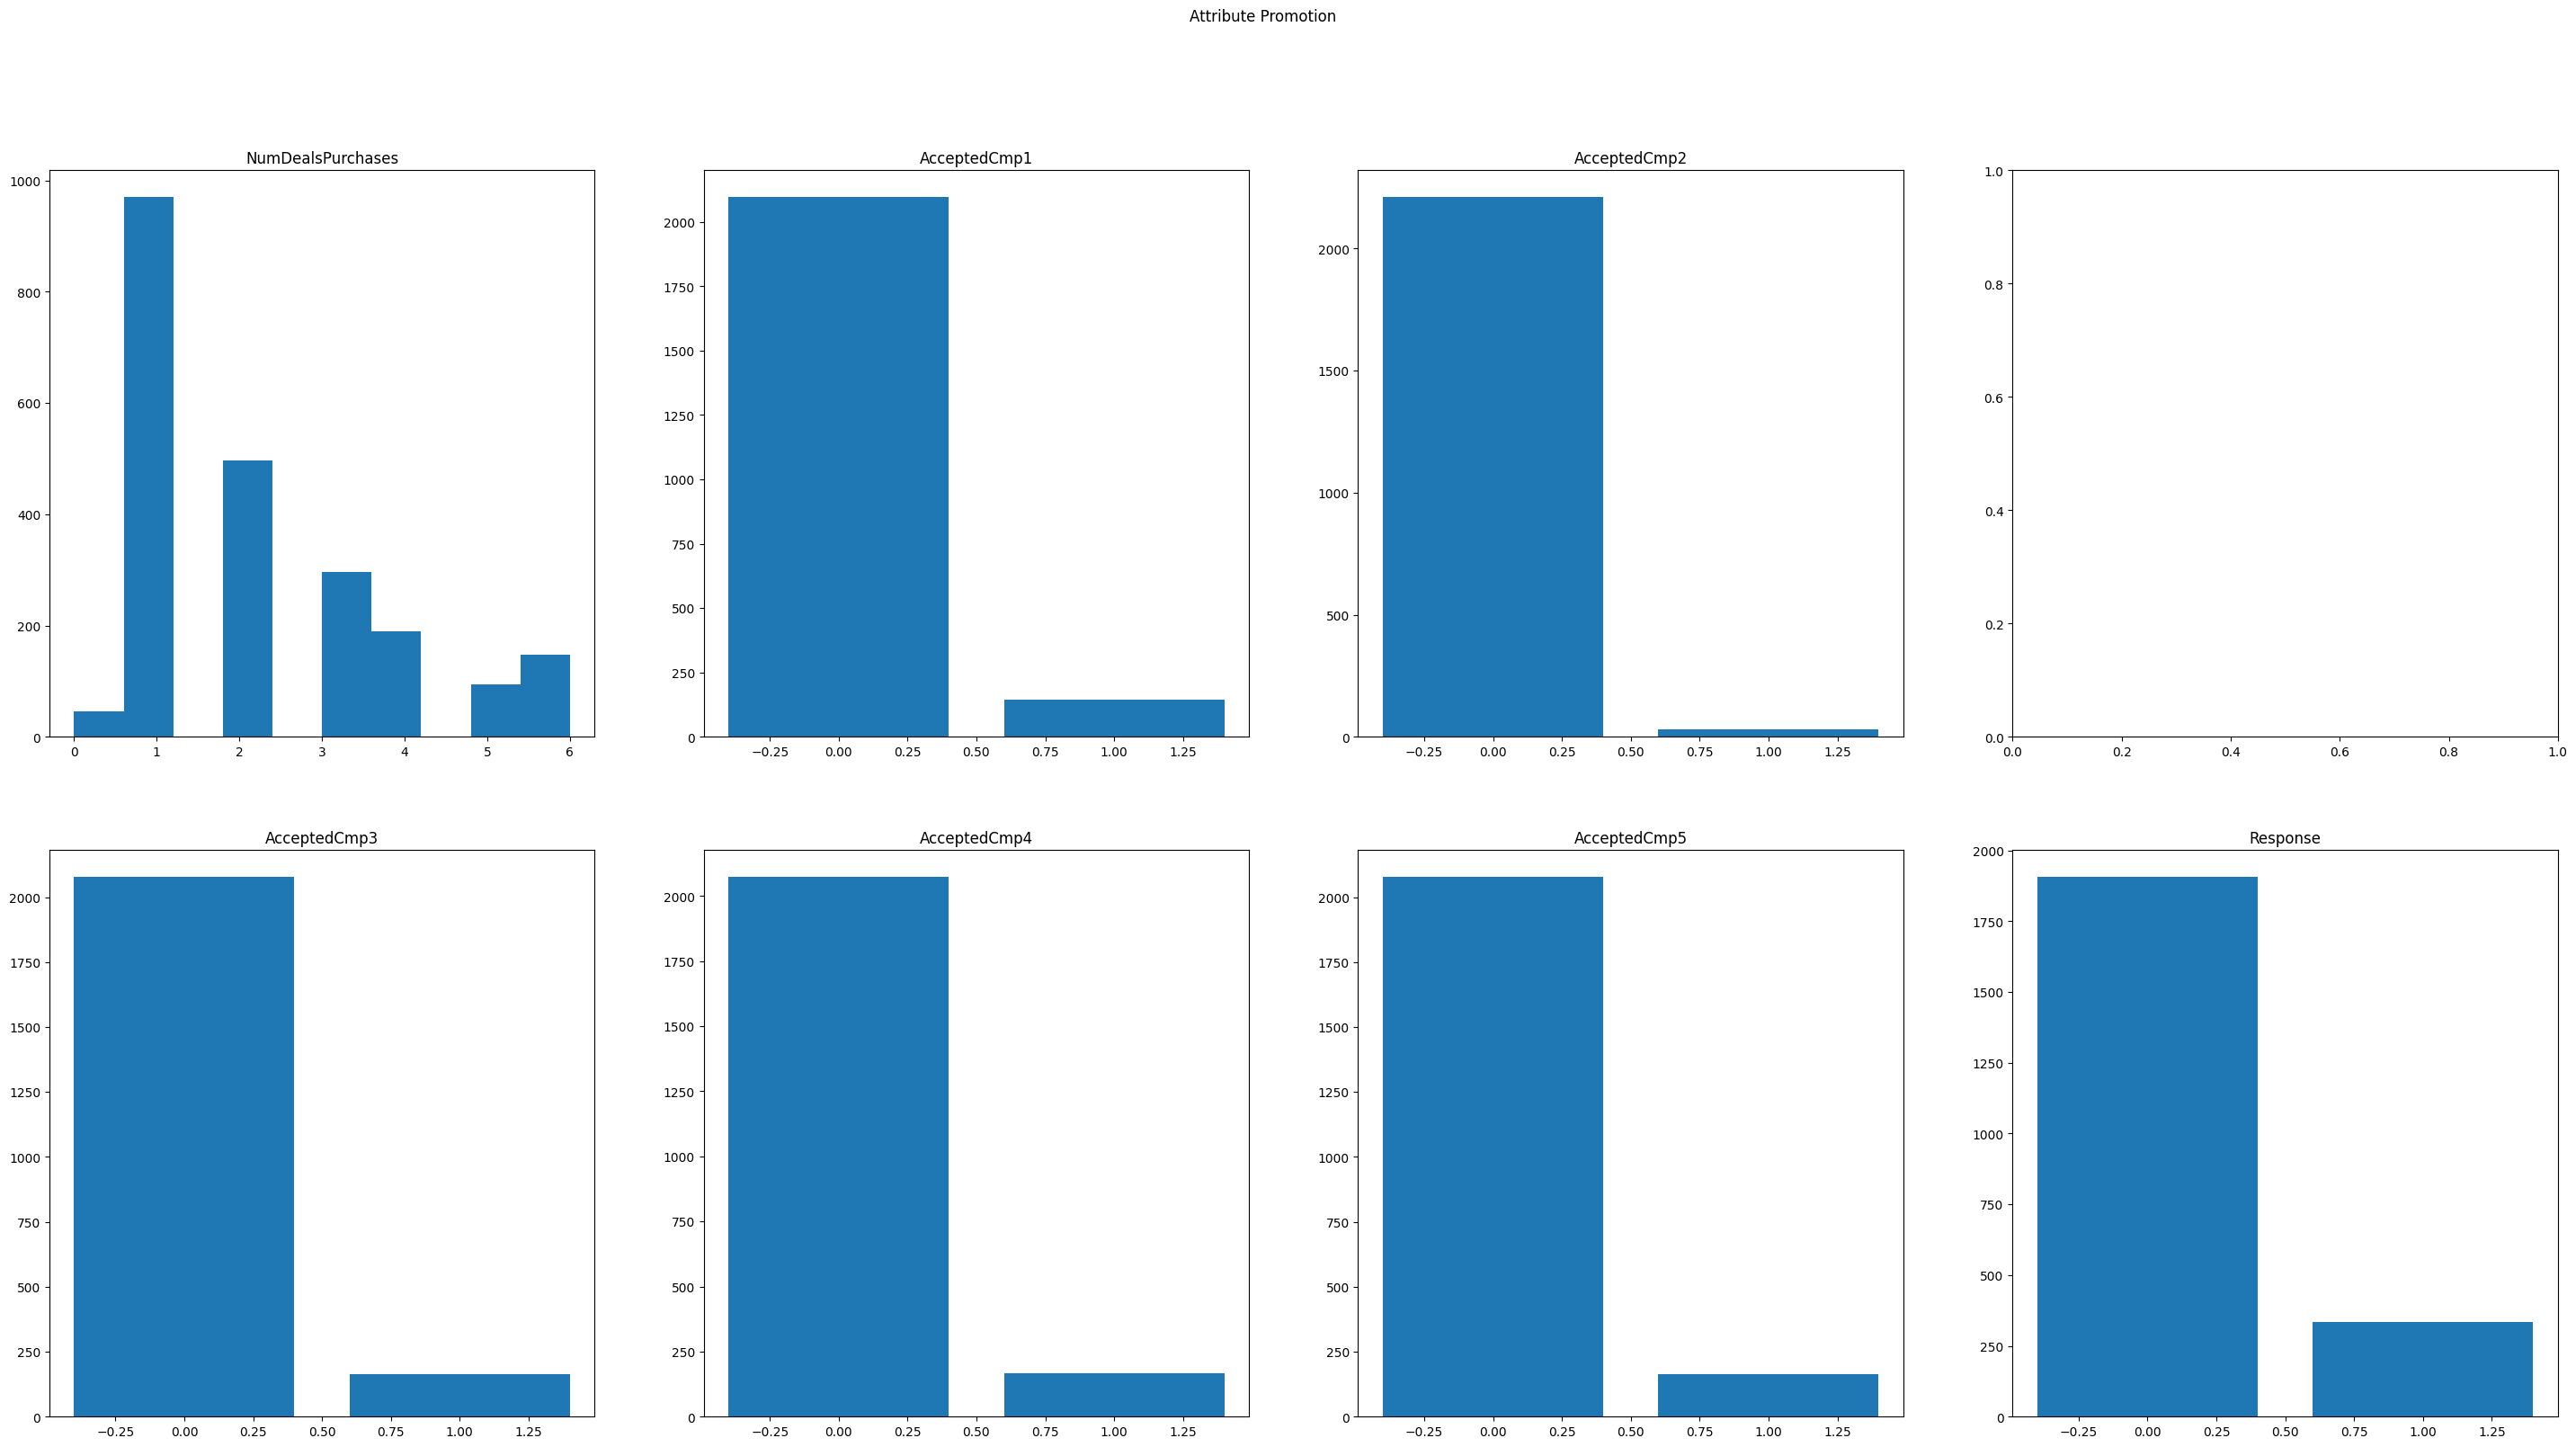

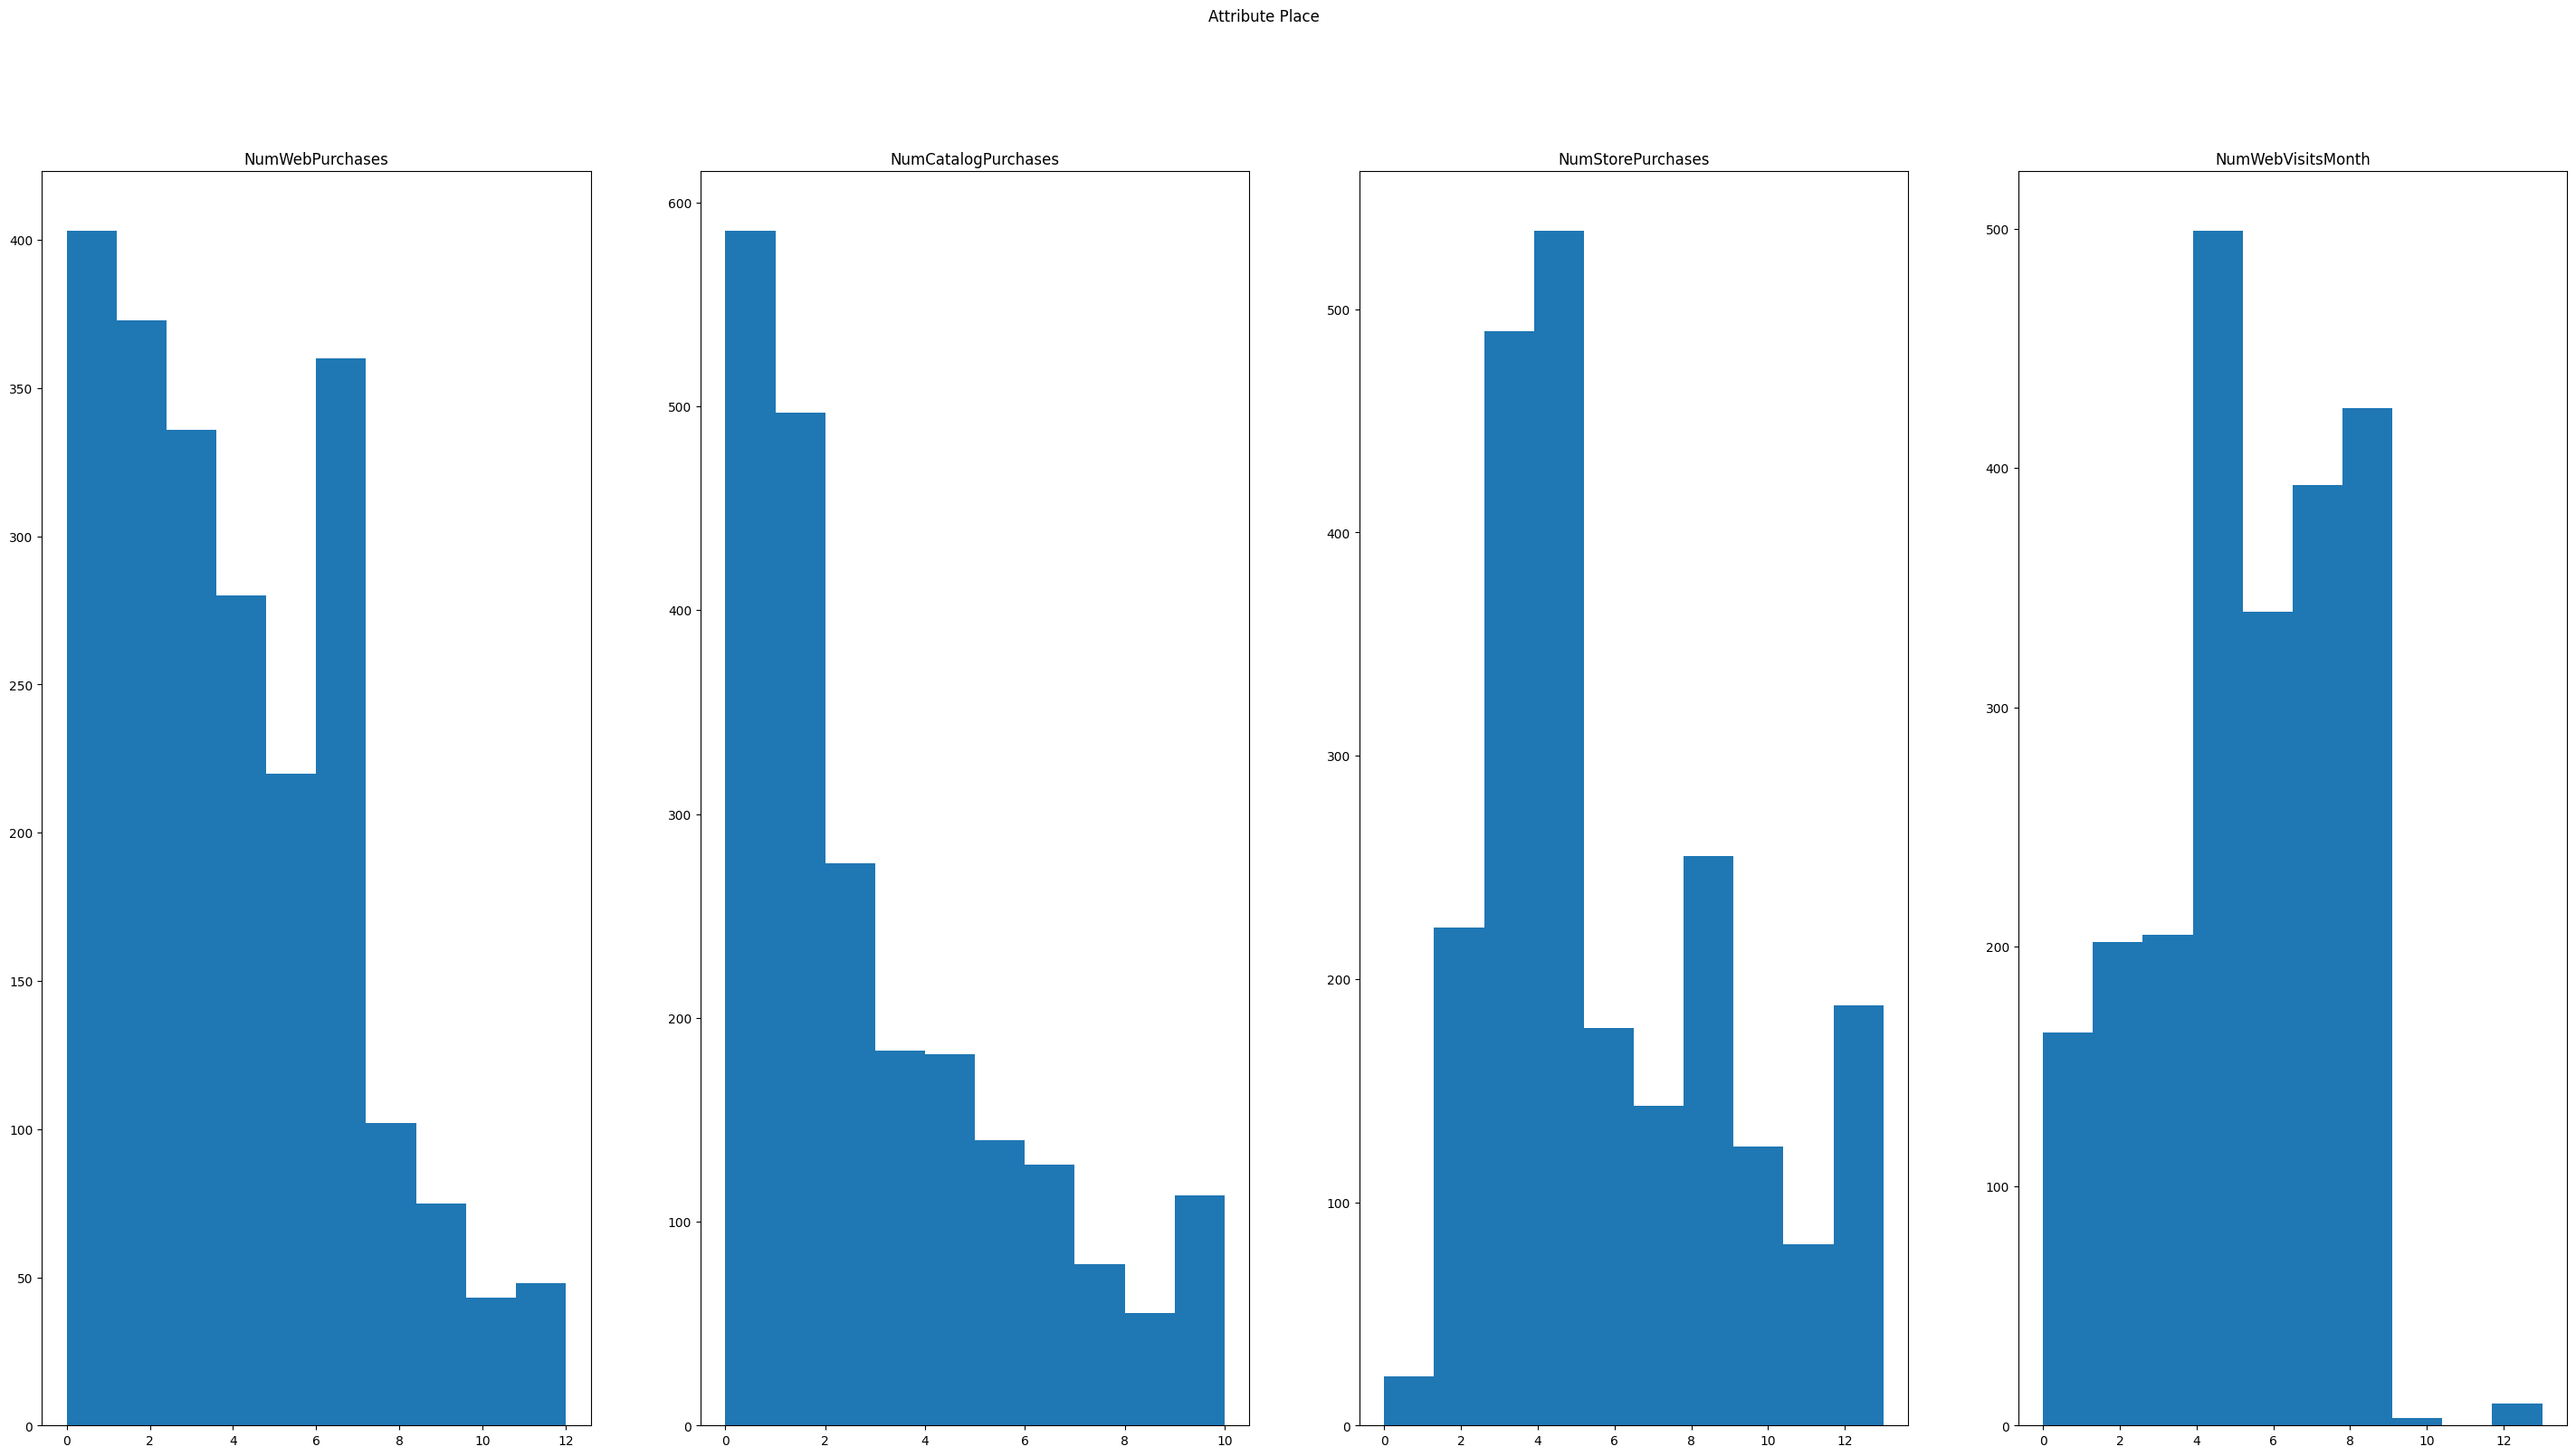

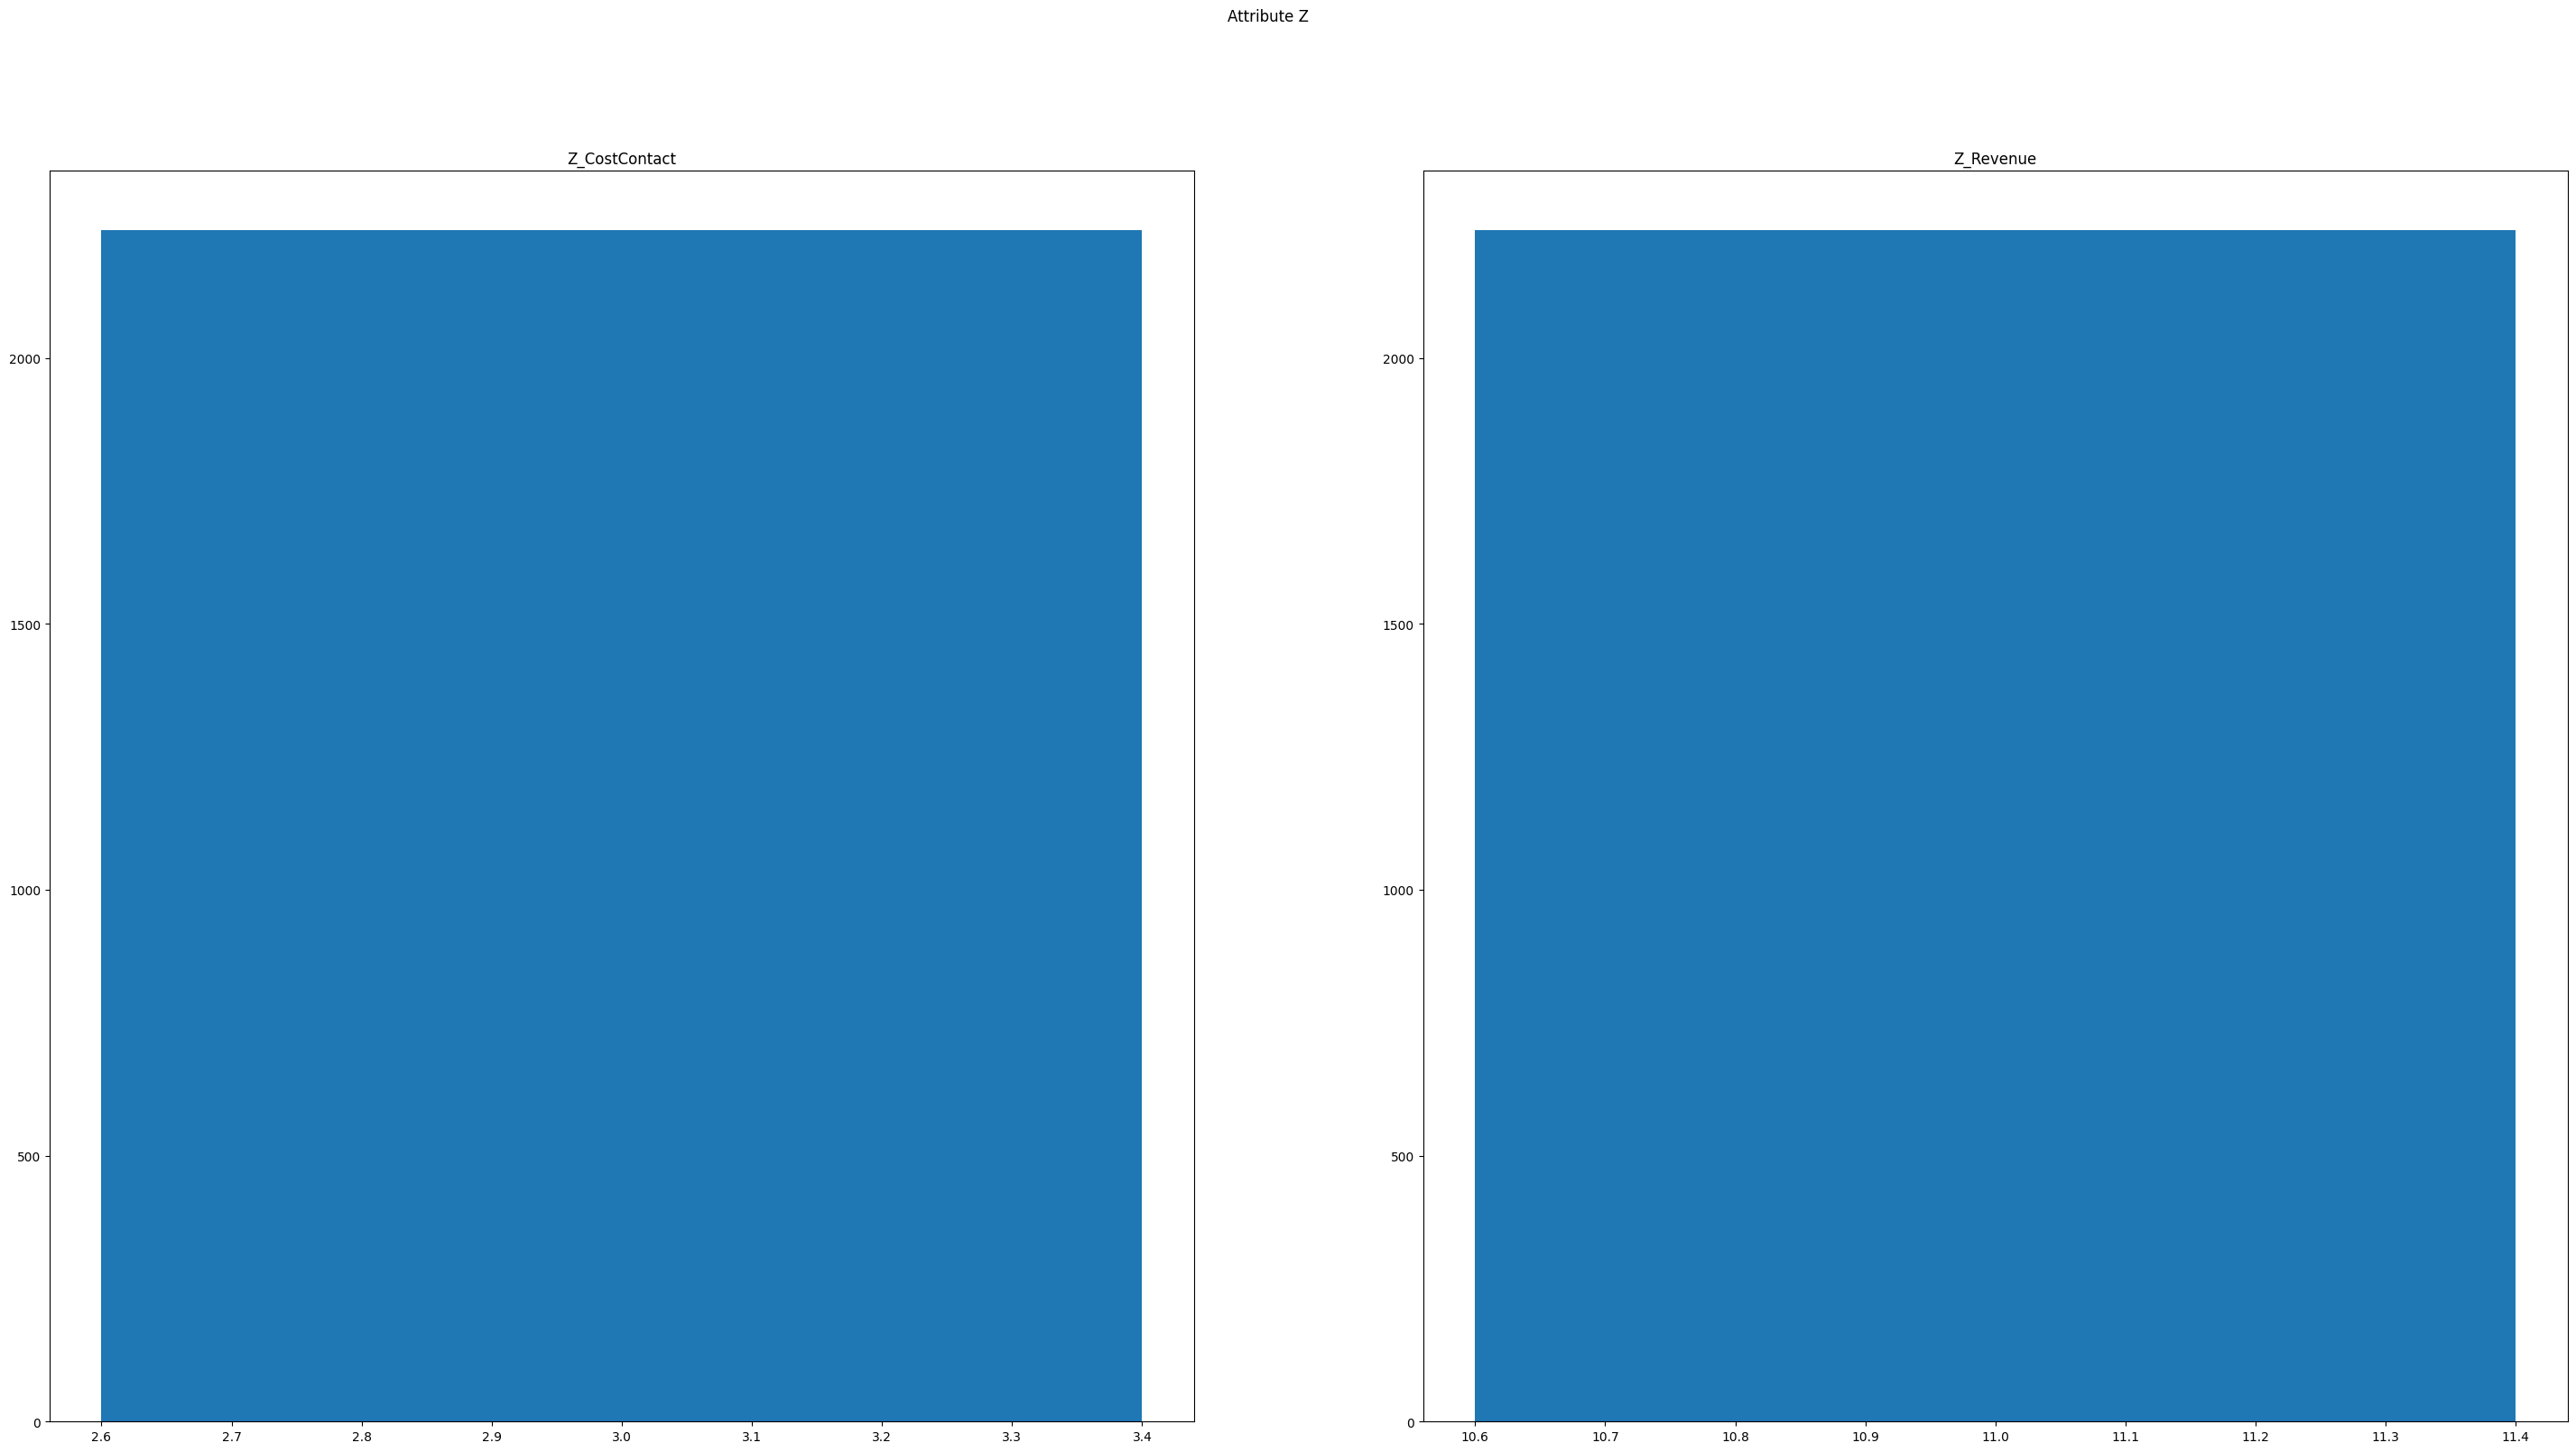

In [8]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting

# import xxx as xxx (Import Graphing Libraries)
# ....
# plt.show()
import matplotlib.pyplot as plt

#Part 1. People
figCat1, axsCat1 = plt.subplots(2, 5, figsize=(36, 18))
figCat1.suptitle("Attribute People")
for category, i in zip(['ID', 'Year_Birth', 'Income', 'Dt_Customer', 'Recency'], range(5)):

    #axsCat1[0, i].scatter(data[category].value_counts().index, data[category].value_counts().values)
    axsCat1[0, i].hist(data[category].values)
    axsCat1[0, i].set_title(category)

for category, i in zip(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain'], range(5)):
    axsCat1[1, i].bar(data[category].value_counts().index, data[category].value_counts().values)
    axsCat1[1, i].set_title(category)

#Part 2. Products
figCat2, axsCat2 = plt.subplots(1, 6, figsize=(36, 18))
figCat2.suptitle("Attribute Product")

for category, i in zip(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], range(6)):
    axsCat2[i].hist(data[category].values)
    axsCat2[i].set_title(category)

#Part 3.Promotion
figCat3, axsCat3 = plt.subplots(2, 4, figsize=(36, 18))
figCat3.suptitle("Attribute Promotion")

for category, i in zip(['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2'], range(3)):
    if(category=='NumDealsPurchases'):
        axsCat3[0, i].hist(data[category].values)
    else:
        axsCat3[0, i].bar(data[category].value_counts().index, data[category].value_counts().values)

    axsCat3[0, i].set_title(category)

for category, i in zip(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], range(4)):
    axsCat3[1, i].bar(data[category].value_counts().index, data[category].value_counts().values)
    axsCat3[1, i].set_title(category)

#Part 4.Place
figCat4, axsCat4 = plt.subplots(1, 4, figsize=(36, 18))
figCat4.suptitle("Attribute Place")
for category, i in zip(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], range(4)):
    axsCat4[i].hist(data[category].values)
    axsCat4[i].set_title(category)

#Part 5.Z
figCat5, axsCat5 = plt.subplots(1, 2, figsize=(36, 18))
figCat5.suptitle("Attribute Z")
for category, i in zip(['Z_CostContact', 'Z_Revenue'], range(2)):
    axsCat5[i].bar(data[category].value_counts().index, data[category].value_counts().values)
    axsCat5[i].set_title(category)

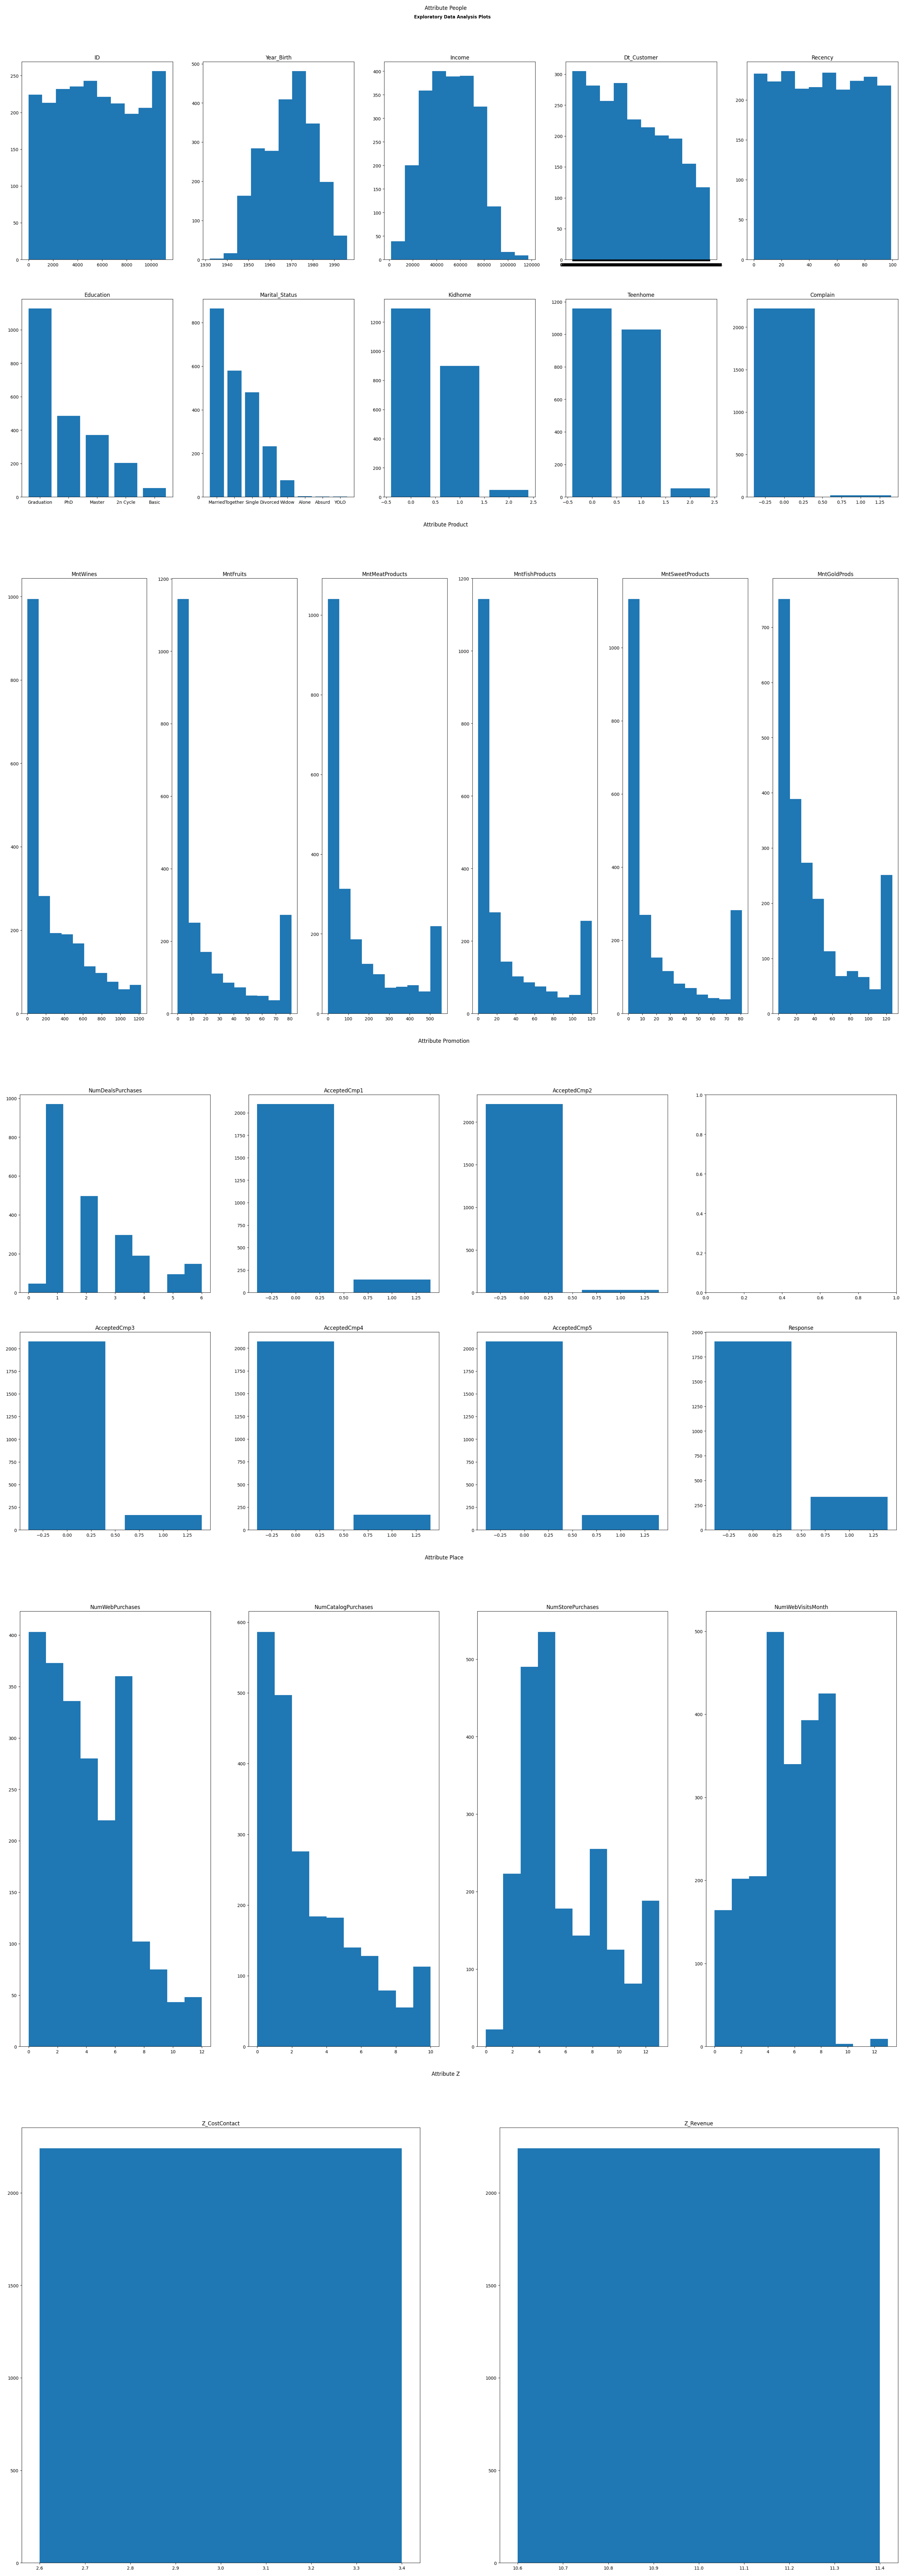

In [9]:
# Create a new figure object for dashboard
figEDA, axsEDA = plt.subplots(nrows=5, ncols=1, figsize=(36, 100))
figEDA.suptitle('Exploratory Data Analysis Plots', fontsize='large', y=0.99, fontweight='bold')

# Add the original figures to the new subplots
axsEDA[0].imshow(figCat1.canvas.buffer_rgba())
axsEDA[1].imshow(figCat2.canvas.buffer_rgba())
axsEDA[2].imshow(figCat3.canvas.buffer_rgba())
axsEDA[3].imshow(figCat4.canvas.buffer_rgba())
axsEDA[4].imshow(figCat5.canvas.buffer_rgba())

# Set the title and labels of the new figure object
figEDA.tight_layout()
for ax in axsEDA:
    ax.axis('off')

> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | All categories in Part 2 (amount of product purchases) and Part 4 (purchased place) are right skewed | Transform data in the categories into normal distribution |
| Pattern 2 | All binary categories are highly imbalanced | Do Data Balancing on the imbalanced categories by using SMOTE method to increase minority|
| Pattern 3 | Both Z_Cost and Z_Revenue have same values in all raw, making it essentialy meaningless for analysis purpose.  | Removing them from analysis and modelling |




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Discrete | Normalization |
Year_Birth         | Discrete | Normalization |      
Education          | Nominal | One Hot Encoding |       
Marital_Status     | Nominal | One Hot Encoding |
Income             | Continuous | Normalization |      
Kidhome            | Discrete | Normalization |        
Teenhome           | Discrete | Normalization |   
Dt_Customer        | Discrete | Feature Engineer |      
Recency            | Discrete | Normalization |     
MntWines           | Continuous | Normalization |    
MntFruits          | Continuous | Normalization |    
MntMeatProducts    | Continuous | Normalization |     
MntFishProducts    | Continuous | Normalization |    
MntSweetProducts   | Continuous | Normalization |    
MntGoldProds       | Continuous | Normalization |
NumDealsPurchases  | Discrete | Normalization |  
NumWebPurchases    | Discrete | Normalization |
NumCatalogPurchases| Discrete | Normalization |
NumStorePurchases  | Discrete | Normalization |  
NumWebVisitsMonth  | Discrete | Normalization |  
AcceptedCmp3       | Discrete | Data Balancing |  
AcceptedCmp4       | Discrete| Data Balancing |       
AcceptedCmp5       | Discrete | Data Balancing |       
AcceptedCmp1       | Discrete | Data Balancing |       
AcceptedCmp2       | Discrete | Data Balancing |       
Complain           | Discrete | Data Balancing |       
Z_CostContact      | Continuous | Missing Data (Removing) |     
Z_Revenue          | Continuous | Missing Data (Removing) |          
Response           | Nominal | Data Balancing |


>  Q2b. Perform the aforementioned Data Preprocessings

In [10]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

# import xxx as xxx (Import panda Libraries)
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from imblearn.over_sampling import SMOTE

dataNormalize = ['ID', 'Year_Birth','Income','Kidhome', 'Teenhome', 'Recency', 'MntWines',
                 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
dataBalanced = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Complain','Response']
dataEncoded = ['Education', 'Marital_Status']
dataFE = 'Dt_Customer'
#dataDropped = ['Z_CostContact', 'Z_Revenue']

for category in dataNormalize:
    transformer = Normalizer().fit(data[category].to_numpy().reshape(1, -1))
    normalizedData = transformer.transform(data[category].to_numpy().reshape(1, -1))
    data[category] = normalizedData.flatten()

for category in dataEncoded:
    ohe = OneHotEncoder()
    ohe.fit(data[[category]])
    data_transformed = ohe.transform(data[[category]]).toarray()
    data_transformed_df = pd.DataFrame(data_transformed, columns=ohe.get_feature_names_out([category]))

    #Concat the encoded data and drop the original one
    data = pd.concat([data.drop(category, axis=1), data_transformed_df], axis=1)

# Transform the Dt_Customer data, which contains date of enrollment of each customer, into the duration of enrollment as it might be more relevant in this scenario
data[dataFE] = pd.to_datetime(data[dataFE], format='%d-%m-%Y')
data[dataFE] = (datetime.now() - data[dataFE]).dt.days

# Normalize Dt_Customer
data[dataFE] = Normalizer().fit(data[dataFE].to_numpy().reshape(1, -1)).transform(data[dataFE].to_numpy().reshape(1, -1)).flatten()
data[dataFE]

# Data balancing
for category in dataBalanced:
    # Separate the features and target variable
    X = data.drop(category, axis=1)
    y = data[category]

    # Create a SMOTE object
    smote = SMOTE()

    # Apply the SMOTE oversampling
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert the resampled data back to and update the original data
    data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[category])], axis=1)

In [11]:
# Feature Selection using Information Value (and univariate feature selection as we have large number of features)

from sklearn.feature_selection import SelectKBest, chi2

# Set target for Feature Selection
columns_to_sum = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
Y = np.sum(data[columns_to_sum], axis=1)

# Perform univariate feature selection on selected features

# Convert dataframe, excluding datas for predictor value Y, to numpy array
data_npArray = data.drop(columns_to_sum, axis=1).to_numpy()

# Perform univariate feature selection on selected features
kbest = SelectKBest(score_func=chi2, k=20)
selected_features_data = kbest.fit_transform(data_npArray, Y)

# Get names of selected features
selected_features = data.drop(columns_to_sum, axis=1).columns[kbest.get_support()]

# Create new dataframe with only selected featurs
data_selected = data.drop(columns_to_sum, axis=1)[selected_features]

In [12]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kidhome                  83144 non-null  float64
 1   Teenhome                 83144 non-null  float64
 2   MntWines                 83144 non-null  float64
 3   MntMeatProducts          83144 non-null  float64
 4   MntFishProducts          83144 non-null  float64
 5   MntSweetProducts         83144 non-null  float64
 6   MntGoldProds             83144 non-null  float64
 7   NumDealsPurchases        83144 non-null  float64
 8   NumCatalogPurchases      83144 non-null  float64
 9   Education_2n Cycle       83144 non-null  float64
 10  Education_Basic          83144 non-null  float64
 11  Education_Graduation     83144 non-null  float64
 12  Education_Master         83144 non-null  float64
 13  Education_PhD            83144 non-null  float64
 14  Marital_Status_Divorce

#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.



---



>  Q3a. Generate Test/Training Data Split

In [13]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split

from sklearn.model_selection import train_test_split # Import Train Test Split From Libraries

#Pareto Principle Split 80/20
X_train, X_test, y_train, y_test = train_test_split(data_selected, Y, test_size= 0.2, random_state= 123)

> Q3b. Choose and deploy dataset to 3+ ML Model

In [14]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# First Model (Support Vector Machine (SVM))

# Step 1. Import Model

from sklearn.svm import SVC
svm = SVC(probability=True, kernel='linear')

# Step 2. Fit Dataframe into Model
svm.fit(X_train, y_train)

# Step 3. Generate Model Prediction (Y)
Y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)

In [15]:
# Second Model (Logistic Regression)

# Step 1. Import Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=1.0, solver='newton-cg')

# Step 2. Fit Dataframe into Model
logreg.fit(X_train, y_train)

# Step 3. Generate Model Prediction (Y)
Y_pred_LR = logreg.predict(X_test)

In [16]:
# Third Model (Random Forest)

# Step 1. Import Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2. Fit Dataframe into Model
rf.fit(X_train, y_train)

# Step 3. Generate Model Prediction (Y)
Y_pred_RF = rf.predict(X_test)



---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve


SVM Evaluation
Accuracy: 0.7586144686992603
Precision: 0.7589991217222111
Recall: 0.7586144686992603
F1 score: 0.7522245910889258
AUC score: 0.8080084188301685


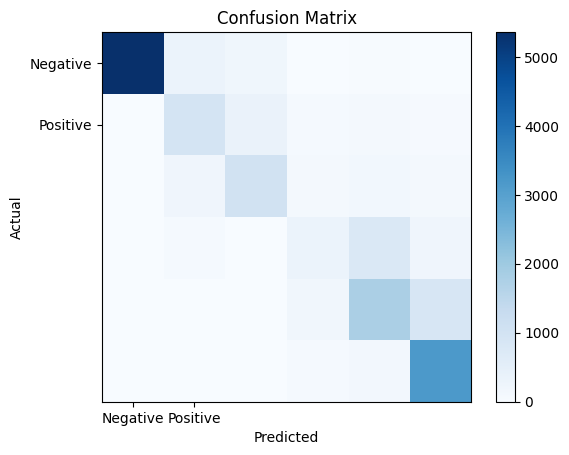

In [17]:
#@title Q4a. Evaluate the Model's Accuracy

from sklearn.metrics import confusion_matrix, auc, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Model 1 (SVM)
print("\nSVM Evaluation")

# Accuracy Score
print("Accuracy:", accuracy_score(y_test, Y_pred_svm))

# Precision Score
print("Precision:", precision_score(y_test,Y_pred_svm,average="weighted"))

# Recall Score
print('Recall:', recall_score(y_test,Y_pred_svm,average="weighted"))

# F1 Score
print('F1 score:', f1_score(y_test, Y_pred_svm,average="weighted"))

# AUC Score

# Calculate AUC score for each class
result_classes = len(np.unique(y_test))
auc_scores_svm = []
for i in range(result_classes):
    y_true_i = (y_test == i).astype(int)
    y_pred_i = (Y_pred_svm == i).astype(int)
    auc_i = roc_auc_score(y_true_i, y_pred_i)
    auc_scores_svm.append(auc_i)

# Average AUC score across all classes
auc_mean_SVM = np.mean(auc_scores_svm)
print("AUC score:", auc_mean_SVM)

# Confusion Matrix
confusion_matrix_SVM = confusion_matrix(y_test, Y_pred_svm)

# Create a figure and axis
figSVM, axSVM = plt.subplots()

# Plot the confusion matrix as a heatmap
imSVM = axSVM.imshow(confusion_matrix_SVM, cmap='Blues')

# Add labels, title, and colorbar to the plot
axSVM.set_xticks([0, 1])
axSVM.set_xticklabels(['Negative', 'Positive'])
axSVM.set_yticks([0, 1])
axSVM.set_yticklabels(['Negative', 'Positive'])
axSVM.set_xlabel('Predicted')
axSVM.set_ylabel('Actual')
axSVM.set_title('Confusion Matrix')
figSVM.colorbar(imSVM)

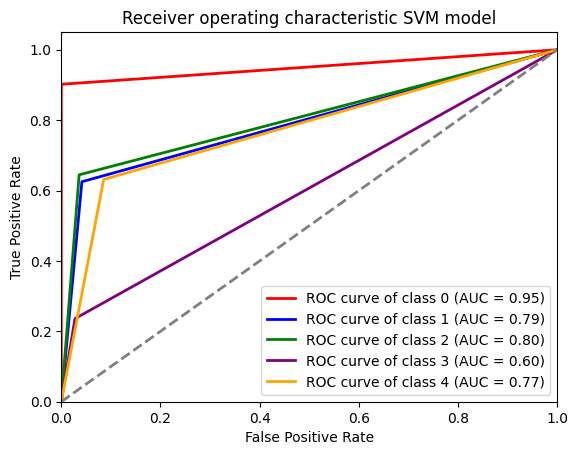

In [48]:
# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
Y_pred_svm_reshaped = np.zeros((len(Y_pred_svm), result_classes))
for i in range(result_classes):
    y_true_i = (y_test == i).astype(int)
    Y_pred_svm_reshaped[:, i] = (Y_pred_svm == i).astype(int)
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_true_i, Y_pred_svm_reshaped[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Compute micro-average ROC curve and ROC area
y_true_SVM = np.eye(result_classes)[y_test]
y_score_SVM = np.eye(result_classes)[np.argmax(Y_pred_svm_reshaped, axis=1)]
fpr_svm["micro"], tpr_svm["micro"], _ = roc_curve(y_true_SVM.ravel(), y_score_SVM.ravel())
roc_auc_svm["micro"] = auc(fpr_svm["micro"], tpr_svm["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr_svm[i] for i in range(result_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(result_classes):
    mean_tpr += np.interp(all_fpr, fpr_svm[i], tpr_svm[i])

# Finally average it and compute AUC
mean_tpr /= result_classes
fpr_svm["macro"] = all_fpr
tpr_svm["macro"] = mean_tpr
roc_auc_svm["macro"] = auc(fpr_svm["macro"], tpr_svm["macro"])

# Create a new Figure object and Axes object
figROC_SVM, axROC_SVM = plt.subplots()

# Plot ROC curve for each class
lw = 2
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, color in zip(range(result_classes), colors):
    axROC_SVM.plot(fpr_svm[i], tpr_svm[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc_svm[i]))
axROC_SVM.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
axROC_SVM.set_xlim([0.0, 1.0])
axROC_SVM.set_ylim([0.0, 1.05])
axROC_SVM.set_xlabel('False Positive Rate')
axROC_SVM.set_ylabel('True Positive Rate')
axROC_SVM.set_title('Receiver operating characteristic SVM model')
axROC_SVM.legend(loc="lower right")


Logistic Regression Evaluation
Accuracy: 0.7571110710205063
Precision: 0.7542699528686512
Recall: 0.7571110710205063
F1 score: 0.7395389050418613
AUC score: 0.8080084188301685


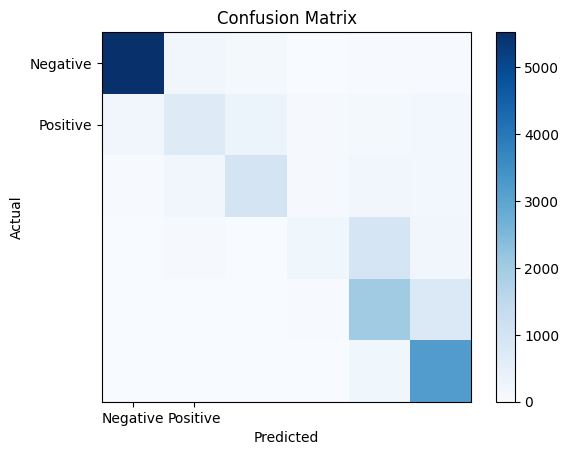

In [25]:
# Model 2 (Logistic Regression)
print("\nLogistic Regression Evaluation")

# Accuracy Score
print("Accuracy:", accuracy_score(y_test, Y_pred_LR))

# Precision Score
print("Precision:", precision_score(y_test,Y_pred_LR,average="weighted"))

# Recall Score
print('Recall:', recall_score(y_test,Y_pred_LR,average="weighted"))

# F1 Score
print('F1 score:', f1_score(y_test, Y_pred_LR,average="weighted"))

# AUC Score

# Calculate AUC score for each class
result_classes = len(np.unique(y_test))
auc_scores_LR = []
for i in range(result_classes):
    y_true_i = (y_test == i).astype(int)
    y_pred_i = (Y_pred_LR == i).astype(int)
    auc_i = roc_auc_score(y_true_i, y_pred_i)
    auc_scores_LR.append(auc_i)

# Average AUC score across all classes
auc_mean_LR = np.mean(auc_scores_svm)
print("AUC score:", auc_mean_LR)

# Confusion Matrix
confusion_matrix_LR = confusion_matrix(y_test, Y_pred_LR)

# Create a figure and axis
figLR, axLR = plt.subplots()

# Plot the confusion matrix as a heatmap
imLR = axLR.imshow(confusion_matrix_LR, cmap='Blues')

# Add labels, title, and colorbar to the plot
axLR.set_xticks([0, 1])
axLR.set_xticklabels(['Negative', 'Positive'])
axLR.set_yticks([0, 1])
axLR.set_yticklabels(['Negative', 'Positive'])
axLR.set_xlabel('Predicted')
axLR.set_ylabel('Actual')
axLR.set_title('Confusion Matrix')
figLR.colorbar(imLR)

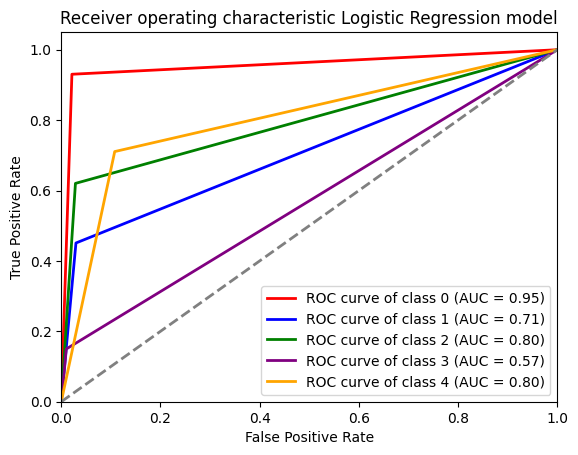

In [26]:
# Compute ROC curve and ROC area for each class
fpr_LR = dict()
tpr_LR = dict()
roc_auc_LR = dict()
Y_pred_LR_reshaped = np.zeros((len(Y_pred_LR), result_classes))
for i in range(result_classes):
    y_true_i = (y_test == i).astype(int)
    Y_pred_LR_reshaped[:, i] = (Y_pred_LR == i).astype(int)
    fpr_LR[i], tpr_LR[i], _ = roc_curve(y_true_i, Y_pred_LR_reshaped[:, i])
    roc_auc_LR[i] = auc(fpr_LR[i], tpr_LR[i])

# Compute micro-average ROC curve and ROC area
y_true_LR = np.eye(result_classes)[y_test]
y_score_LR = np.eye(result_classes)[np.argmax(Y_pred_LR_reshaped, axis=1)]
fpr_LR["micro"], tpr_LR["micro"], _ = roc_curve(y_true_LR.ravel(), y_score_LR.ravel())
roc_auc_LR["micro"] = auc(fpr_LR["micro"], tpr_LR["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_LR = np.unique(np.concatenate([fpr_LR[i] for i in range(result_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_LR = np.zeros_like(all_fpr_LR)
for i in range(result_classes):
    mean_tpr_LR += np.interp(all_fpr_LR, fpr_LR[i], tpr_LR[i])

# Finally average it and compute AUC
mean_tpr_LR /= result_classes
fpr_LR["macro"] = all_fpr_LR
tpr_LR["macro"] = mean_tpr_LR
roc_auc_LR["macro"] = auc(fpr_LR["macro"], tpr_LR["macro"])

# Create a new Figure object and Axes object
figROC_LR, axROC_LR = plt.subplots()

# Plot ROC curve for each class
lw = 2
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, color in zip(range(result_classes), colors):
    axROC_LR.plot(fpr_LR[i], tpr_LR[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc_LR[i]))
axROC_LR.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
axROC_LR.set_xlim([0.0, 1.0])
axROC_LR.set_ylim([0.0, 1.05])
axROC_LR.set_xlabel('False Positive Rate')
axROC_LR.set_ylabel('True Positive Rate')
axROC_LR.set_title('Receiver operating characteristic Logistic Regression model')
axROC_LR.legend(loc="lower right")


Random Forest Evaluation
Accuracy: 0.9889349930843707
Precision: 0.9890185795994024
Recall: 0.9889349930843707
F1 score: 0.9889667643027271
AUC score: 0.9915175123715122


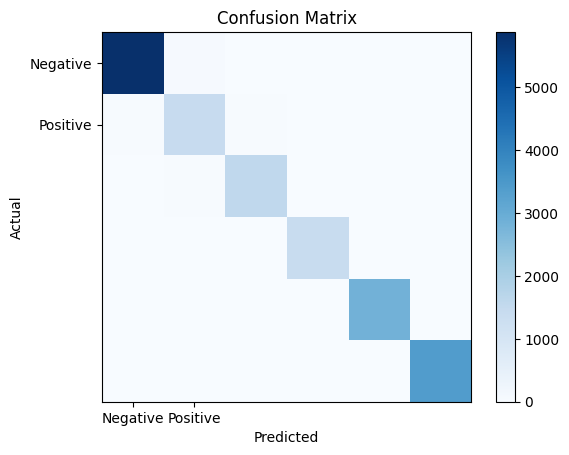

In [27]:
# Model 3 (Random Forests)
print("\nRandom Forest Evaluation")

# Accuracy Score
print("Accuracy:", accuracy_score(y_test, Y_pred_RF))

# Precision Score
print("Precision:", precision_score(y_test,Y_pred_RF,average="weighted"))

# Recall Score
print('Recall:', recall_score(y_test,Y_pred_RF,average="weighted"))

# F1 Score
print('F1 score:', f1_score(y_test, Y_pred_RF,average="weighted"))

# AUC Score

# Calculate AUC score for each class
result_classes = len(np.unique(y_test))
auc_scores_RF = []
for i in range(result_classes):
    y_true_i = (y_test == i).astype(int)
    y_pred_i = (Y_pred_RF == i).astype(int)
    auc_i = roc_auc_score(y_true_i, y_pred_i)
    auc_scores_RF.append(auc_i)

# Average AUC score across all classes
auc_mean_RF = np.mean(auc_scores_RF)
print("AUC score:", auc_mean_RF)

# Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test, Y_pred_RF)

# Create a figure and axis
figRF, axRF = plt.subplots()

# Plot the confusion matrix as a heatmap
imRF = axRF.imshow(confusion_matrix_RF, cmap='Blues')

# Add labels, title, and colorbar to the plot
axRF.set_xticks([0, 1])
axRF.set_xticklabels(['Negative', 'Positive'])
axRF.set_yticks([0, 1])
axRF.set_yticklabels(['Negative', 'Positive'])
axRF.set_xlabel('Predicted')
axRF.set_ylabel('Actual')
axRF.set_title('Confusion Matrix')
figRF.colorbar(imRF)

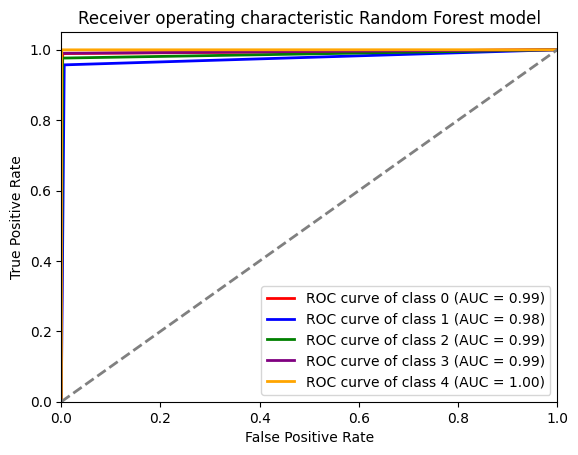

In [28]:
# Compute ROC curve and ROC area for each class
fpr_RF = dict()
tpr_RF = dict()
roc_auc_RF = dict()
Y_pred_RF_reshaped = np.zeros((len(Y_pred_RF), result_classes))
for i in range(result_classes):
    y_true_i = (y_test == i).astype(int)
    Y_pred_RF_reshaped[:, i] = (Y_pred_RF == i).astype(int)
    fpr_RF[i], tpr_RF[i], _ = roc_curve(y_true_i, Y_pred_RF_reshaped[:, i])
    roc_auc_RF[i] = auc(fpr_RF[i], tpr_RF[i])

# Compute micro-average ROC curve and ROC area
y_true_RF = np.eye(result_classes)[y_test]
y_score_RF = np.eye(result_classes)[np.argmax(Y_pred_RF_reshaped, axis=1)]
fpr_RF["micro"], tpr_RF["micro"], _ = roc_curve(y_true_RF.ravel(), y_score_RF.ravel())
roc_auc_RF["micro"] = auc(fpr_RF["micro"], tpr_RF["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_RF = np.unique(np.concatenate([fpr_RF[i] for i in range(result_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_RF = np.zeros_like(all_fpr_RF)
for i in range(result_classes):
    mean_tpr_RF += np.interp(all_fpr_RF, fpr_RF[i], tpr_RF[i])

# Finally average it and compute AUC
mean_tpr_RF /= result_classes
fpr_RF["macro"] = all_fpr_RF
tpr_RF["macro"] = mean_tpr_RF
roc_auc_RF["macro"] = auc(fpr_RF["macro"], tpr_RF["macro"])

# Create a new Figure object and Axes object
figROC_RF, axROC_RF = plt.subplots()

# Plot ROC curve for each class
lw = 2
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, color in zip(range(result_classes), colors):
    axROC_RF.plot(fpr_RF[i], tpr_RF[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc_RF[i]))
axROC_RF.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
axROC_RF.set_xlim([0.0, 1.0])
axROC_RF.set_ylim([0.0, 1.05])
axROC_RF.set_xlabel('False Positive Rate')
axROC_RF.set_ylabel('True Positive Rate')
axROC_RF.set_title('Receiver operating characteristic Random Forest model')
axROC_RF.legend(loc="lower right")

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

**Answer:**

I choose Model SVM (Support Vector Model) because it has a high but realistic accuracy. Given the nature of the dataset and the project's goal that aims to predict the likelihood of a certain decision, this project can be treated as a classification project, and SVM is a model that works for classification with high dimension of features, just like the dataset.



---



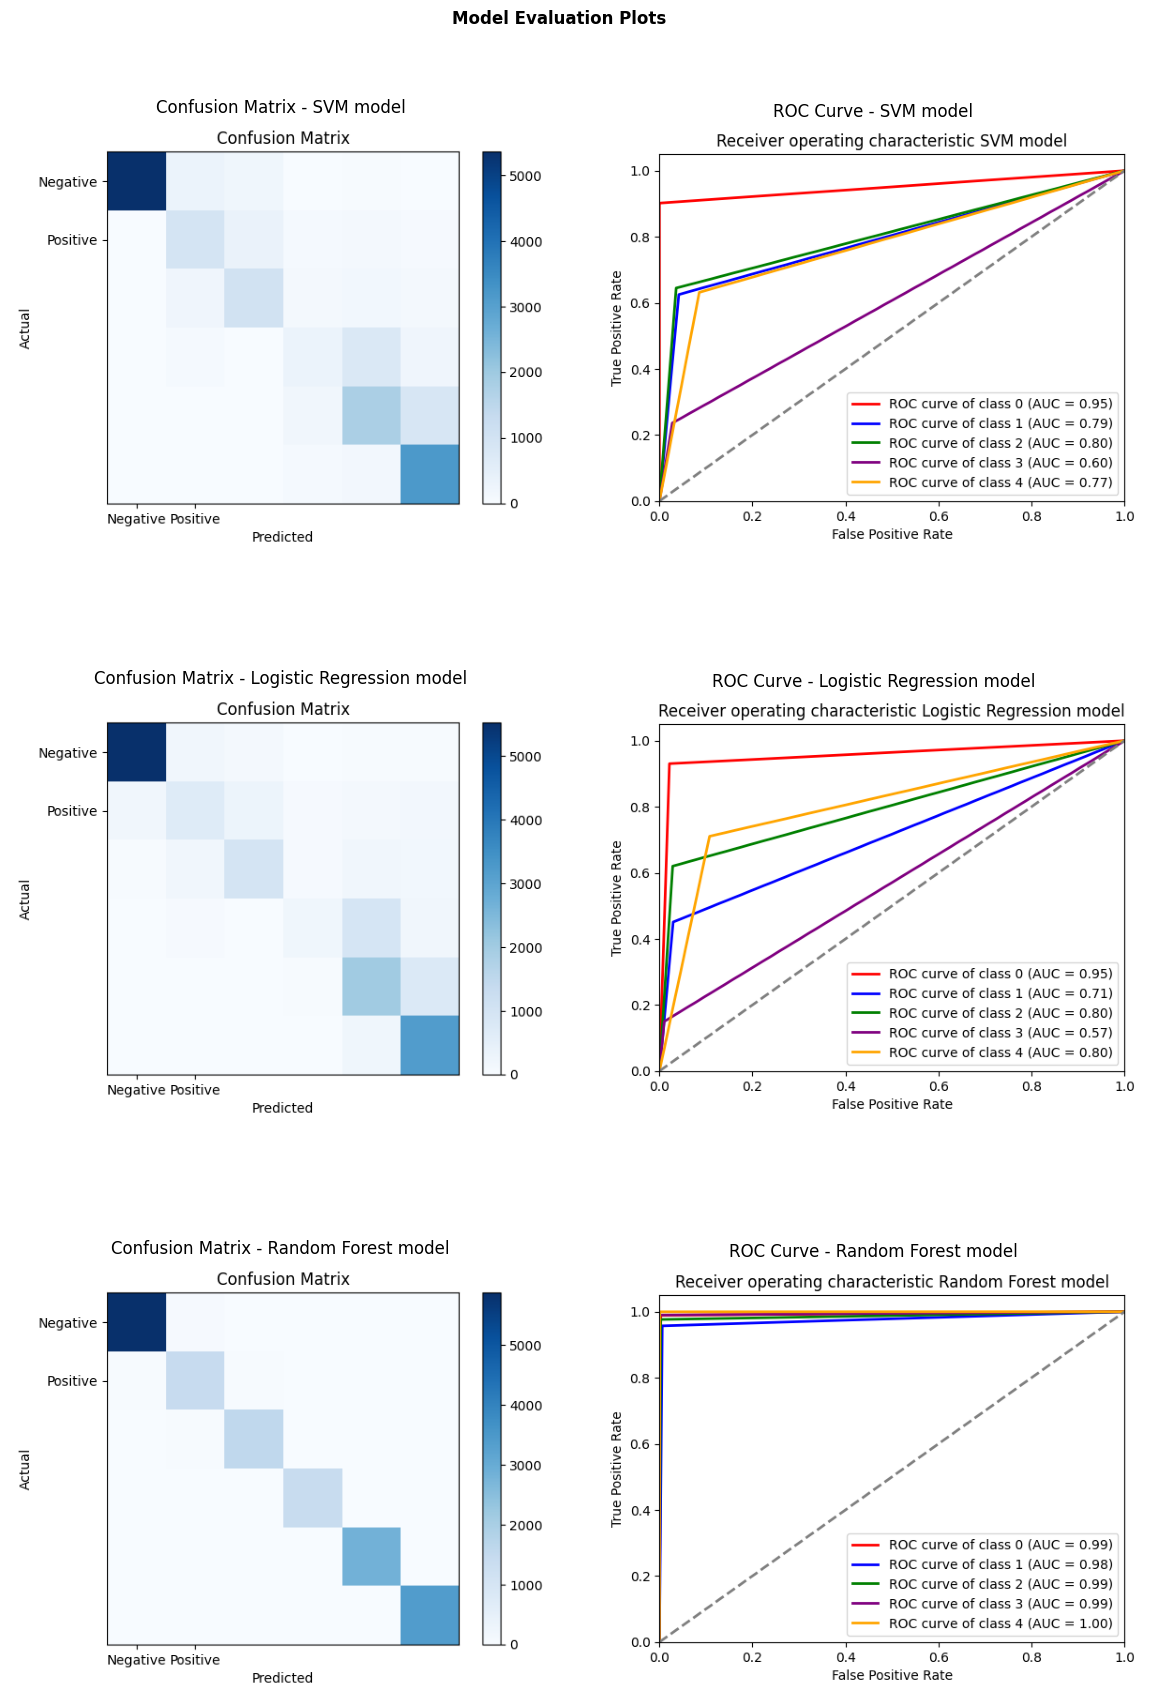

In [30]:
# Create a new figure for Dashboard

# Create a new figure object
figME, axsME = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
figME.suptitle('Model Evaluation Plots', fontsize='large', y=0.99, fontweight='bold')

# Add the original figures to the new subplots
axsME[0, 0].imshow(figSVM.canvas.buffer_rgba())
axsME[0, 1].imshow(figROC_SVM.canvas.buffer_rgba())
axsME[1, 0].imshow(figLR.canvas.buffer_rgba())
axsME[1, 1].imshow(figROC_LR.canvas.buffer_rgba())
axsME[2, 0].imshow(figRF.canvas.buffer_rgba())
axsME[2, 1].imshow(figROC_RF.canvas.buffer_rgba())

# Set the title and labels of the new figure object
figME.tight_layout()
axsME[0, 0].set_title('Confusion Matrix - SVM model')
axsME[0, 1].set_title('ROC Curve - SVM model')
axsME[1, 0].set_title('Confusion Matrix - Logistic Regression model')
axsME[1, 1].set_title('ROC Curve - Logistic Regression model')
axsME[2, 0].set_title('Confusion Matrix - Random Forest model')
axsME[2, 1].set_title('ROC Curve - Random Forest model')
for ax in axsME.ravel():
    ax.axis('off')

#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

In [31]:
# For optimization purpose, I decided to reduce the number of rows due to large execution time

# Randomly choose n number of samples to decrease execution time
import random
random.seed(42)  # Set a random seed for reproducibility

# Select a random subset of n_samples rows from the full dataset

# Reset the index of X_train and y_train
X_sample = X_train.reset_index(drop=True)
y_sample = y_train.reset_index(drop=True)

n_samples = 10000
sample_indices = random.sample(range(len(X_sample)), n_samples)
X_sample = X_sample.loc[sample_indices]
y_sample = y_sample.loc[sample_indices]

>  Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

In [ ]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

# Define a range of values for the hyperparameters of SVM (C and gamma)
C_values = [0.1, 0.5, 1, 5, 10]
gamma_values = [0.01, 0.1, 1]

# Train and evaluate the SVM model with different hyperparameter combinations
best_score = 0
best_C = 0
best_gamma = 0

for C in C_values:
    for gamma in gamma_values:
        svm_model = SVC(C=C, gamma=gamma, kernel='linear', probability=True)
        svm_model.fit(X_sample, y_sample)
        y_pred = svm_model.predict(X_test)

        # Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
        score = accuracy_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_C = C
            best_gamma = gamma

print('Best accuracy score:', best_score)
print('Best C:', best_C)
print('Best Gamma:', best_gamma)

# Due to high execution time when trying out different kernel values, I decided to not include it and only experimenting with C & gamma

>  Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

In [32]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)

svm_grid = {'C': [0.1, 0.5, 1, 5, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3, 4],
            'gamma': [0.01, 0.1, 1, 10, 'scale', 'auto']}

# Create an SVM model
svm_base = SVC()

# Create a randomized search object
rand_search = RandomizedSearchCV(svm_base, svm_grid, n_iter=10, cv=5, random_state=42)

# Fit the randomized search object to the data
rand_search.fit(X_sample, y_sample)

# Print the best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

# Create a new SVM model with the best hyperparameters
best_svm_model_CV = SVC(C=rand_search.best_params_['C'],
                     kernel=rand_search.best_params_['kernel'],
                     degree=rand_search.best_params_['degree'],
                     gamma=rand_search.best_params_['gamma'],
                       probability=True)

# Train the model on the training data
best_svm_model_CV.fit(X_sample, y_sample)

# Use the trained model to make predictions on the test data
y_pred_svm_CV = best_svm_model_CV.predict(X_test)

# Calculate the accuracy score of the model on the test data
accuracy_CV = accuracy_score(y_test, y_pred_svm_CV)
print('Accuracy:', accuracy_CV)

Best hyperparameters: {'kernel': 'rbf', 'gamma': 10, 'degree': 2, 'C': 10}
Accuracy: 0.9042636358169464


>  Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

In [ ]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
from sklearn.ensemble import BaggingClassifier

# Step 2. Add ensembling methods on top of Base models

# Define the base SVM model
svm_base_Bagging = SVC()

# Define the bagging classifier
bagging_model = BaggingClassifier(estimator=svm_base_Bagging, n_estimators=10, max_samples=0.5, max_features=0.5, random_state=42)

# Train the bagging classifier on the training data
bagging_model.fit(X_sample, y_sample)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

# Use the bagging classifier to make predictions on the test data
accuracy_Bagging = bagging_model.score(X_test, y_test)
print('Accuracy:', accuracy_Bagging)



---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

> Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

In [33]:
# Define the feature names
feature_names = data_selected.columns.tolist()

In [34]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=714eda2f0506077ff138c50905422cbe1ab122e73caf5073a459f1f40ce5e587
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


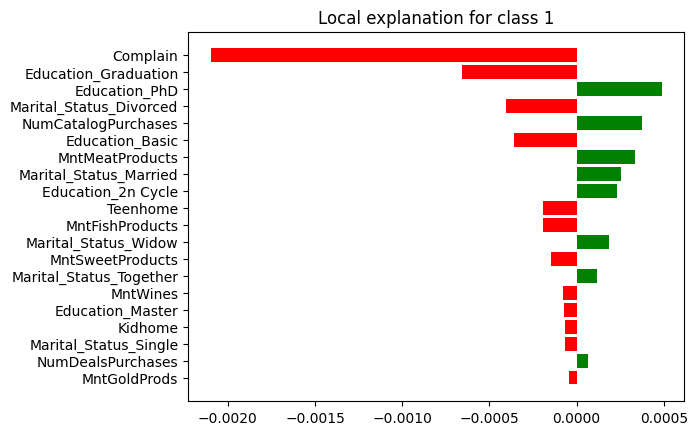

In [35]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

# 1st graph - LIME

# Step 1. Import Graph Plotting Libraries (if any)

import lime
import lime.lime_tabular

# Define the function to predict the target variable using the SVM model
predict_fn = lambda x: best_svm_model_CV.predict_proba(x).astype(float)

# Define the Lime explainer
explainer_LIME = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, discretize_continuous=False)

# Select a single test instance to explain
idx = 0
instance = X_test.iloc[idx]

# Generate an explanation for the selected instance using LIME
exp_LIME = explainer_LIME.explain_instance(instance.values, predict_fn, num_features=len(feature_names))

# Plot the LIME explanation
fig_LIME = exp_LIME.as_pyplot_figure()
plt.show()

Text(0.5, 0, 'Permutation Importance')

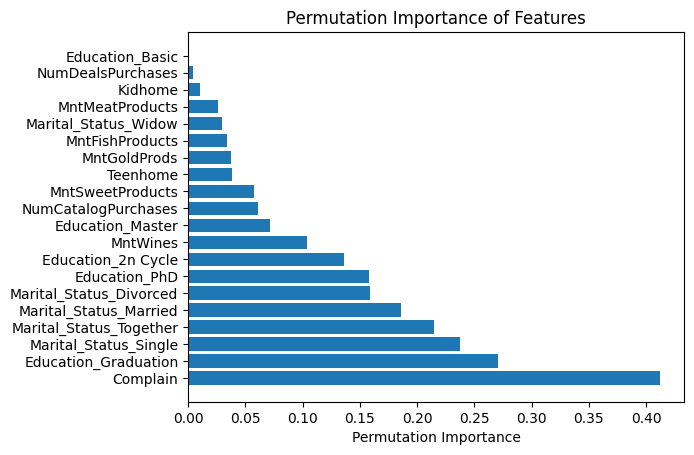

In [38]:
#2nd graph - Feature Importance

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_svm_model_CV, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Create a new Figure object and Axes object
figPermImp, axPermImp = plt.subplots()

# Plot the permutation importance bar chart
axPermImp.barh([feature_names[i] for i in sorted_idx], perm_importance.importances_mean[sorted_idx])
axPermImp.set_title('Permutation Importance of Features')
axPermImp.set_xlabel('Permutation Importance')

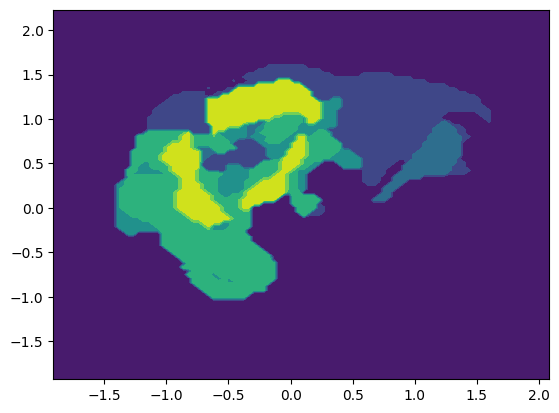

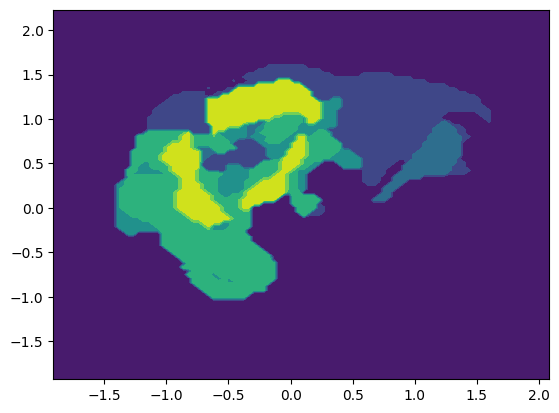

In [39]:
# 3rd graph - DecisionBoundaryDisplay

from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

# Reduce the dimensionality of the dataset to two dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

duplicate_svm_model = SVC(C=rand_search.best_params_['C'],
                     kernel=rand_search.best_params_['kernel'],
                     degree=rand_search.best_params_['degree'],
                     gamma=rand_search.best_params_['gamma'],
                       probability=True)

# Train the chosen SVM classifier on the reduced dataset
duplicate_svm_model.fit(X_pca, y_sample)

# Create a DecisionBoundaryDisplay visualizer from the trained classifier and the reduced data
viz = DecisionBoundaryDisplay.from_estimator(duplicate_svm_model, X_pca)

# Create a new Figure object and Axes object
figDB, axDB = plt.subplots()

# Plot the decision boundary
viz.plot(ax=axDB)

Based on the above graphs of optimized model that I created, whether customer has complained in the last 2 years or not might considerably affect the decision of accepting newest promotional offer or not, and it affects negatively. This negative correlation also seen in people who graduated (shown by Education_Graduation). Moreover, the number of catalog purchased can have a positive correlation to whether a customer will accept the offer or not.

Apart from the mentioned categories, there are some datas that can be followed up such as the marital status of a customer. They have quite a significant fature importance but for now, the implication seems to be unclear.

While the model is trained by following all Machine Learning principles and having >75% accuracy, there are still many rooms for improvement.

First, the model should be trained, optimized, and evaluated with a consistent dataset. However, the long execution time from my side (might be related to external factors) made me reduce the size of the dataset by randomly choosing the rows. Training with the same dataset for the aforementioned process can help us to gain a reliable understanding about our model and avoid any potential of overfitting.

Other than that, the current model's configuration (e.g. hyperparameters) might not be the best option to predict the expected outcome. Regardless this is related or not, there were one to two points in the process where some calculations/graphing can't be done due to the nature of the data and expected result, as well as the model, that I set. In the future, I hope to gain more understanding about what models & corresponding configuration work best for a prediction goal (and corresponding dataset).

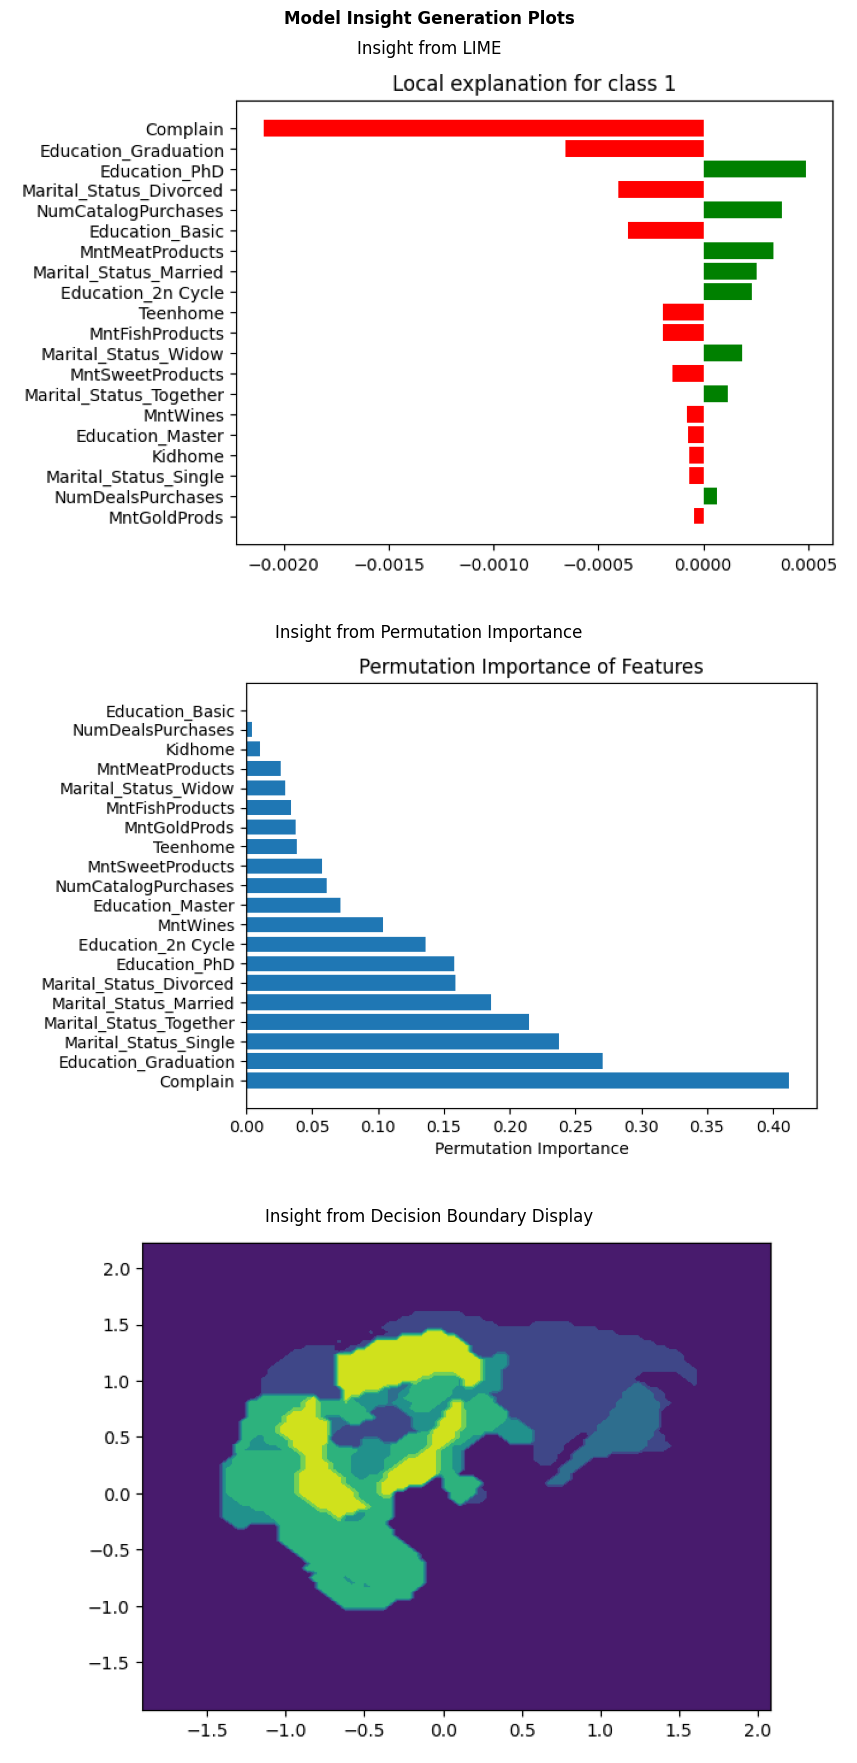

In [41]:
# Create a new figure for Dashboard

# Create a new figure object
figMIG, axsMIG = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
figMIG.suptitle('Model Insight Generation Plots', fontsize='large', y=0.99, fontweight='bold')

# Add the original figures to the new subplots
axsMIG[0].imshow(fig_LIME.canvas.buffer_rgba())
axsMIG[1].imshow(figPermImp.canvas.buffer_rgba())
axsMIG[2].imshow(figDB.canvas.buffer_rgba())

# Set the title and labels of the new figure object
figMIG.tight_layout()
axsMIG[0].set_title('Insight from LIME')
axsMIG[1].set_title('Insight from Permutation Importance')
axsMIG[2].set_title('Insight from Decision Boundary Display')

# Set the title and labels of the new figure object
figMIG.tight_layout()
for ax in axsMIG:
    ax.axis('off')



---



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)



In [56]:
# For optimization purpose, I decided to reduce the number of rows due to large execution time. For more accurate result, can change the number of num_samples

# Randomly choose n number of samples to decrease execution time
import random
random.seed(42)  # Set a random seed for reproducibility

# Select a random subset of n_samples rows from the full dataset

# Reset the index of X_train and y_train
X_sample_test = X_test.reset_index(drop=True)
y_sample_test = y_test.reset_index(drop=True)

num_samples = 50
sample_indices = random.sample(range(len(X_sample_test)), num_samples)
X_sample_test = X_sample_test.loc[sample_indices]
y_sample_test = y_sample_test.loc[sample_indices]

In [42]:
!pip install explainerdashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [57]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(best_svm_model_CV, X_sample_test, y_sample_test,
                                 shap='kernel')

ExplainerDashboard(explainer, model_summary=True, shap_interaction=False, shap_dependence=False,
                   importances=True, contributions=True, title="SVM Model Explanation", whatif=False).run()


Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/50 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>